# Part A) Extracting text from Editable PDFs

## 1) Capture only the links present in GFK dataset

In [1]:
import pandas as pd
import numpy as np
import glob
from os import listdir
from os.path import isfile, join, splitext

In [2]:
base_path ='D:\\IBM_B2B_C_Onboarding\Data'

In [3]:
data_path ='D:\\IBM_B2B_C_Onboarding\Data\GFK_Data'
filenames = [f for f in listdir(data_path) if isfile(join(data_path, f))]
# print(filenames)
# print('File names = {} '.format (filenames))
# Read the column where links are present
df_links=['User-Manual','Manufacturer-Brochure','Educational-Brochure','Assembly-Instructions',
        'Energy-Guide','Additional-pdf1','Additional-pdf2', 'Additional-pdf3',
        'Additional-pdf4','Additional-pdf5','Additional-pdf6','Additional-pdf7',
        'Additional-pdf8','Additional-pdf9','Additional-pdf10']
df_last = None

for file in filenames:
   # reading excel files
    df=pd.read_excel(data_path +'\\'+file)
    df = df.dropna(axis='index', subset=df_links, how='all')[df_links]
    # print(file,df.shape)

    if df_last is None:
        df_last=df  
    else:
        df_last=pd.concat([df_last,df],axis=0, ignore_index=True)
        # print(Series_final)
print("Total : ",df_last.shape)

Total :  (807, 15)


In [4]:
final_values = None

for column in df_links:
    df = pd.DataFrame(columns=['Type', 'Link'])
    df['Link'] = df_last[column].dropna()
    df['Type'] = str(column)
    print(f'Column {column}, {df.shape}')
    if final_values is None:
        final_values = df
    else:
        final_values = pd.concat([final_values, df], axis=0, ignore_index=True)

Column User-Manual, (211, 2)
Column Manufacturer-Brochure, (439, 2)
Column Educational-Brochure, (4, 2)
Column Assembly-Instructions, (8, 2)
Column Energy-Guide, (0, 2)
Column Additional-pdf1, (316, 2)
Column Additional-pdf2, (260, 2)
Column Additional-pdf3, (237, 2)
Column Additional-pdf4, (228, 2)
Column Additional-pdf5, (219, 2)
Column Additional-pdf6, (43, 2)
Column Additional-pdf7, (1, 2)
Column Additional-pdf8, (1, 2)
Column Additional-pdf9, (1, 2)
Column Additional-pdf10, (0, 2)


In [5]:
final_values = final_values.drop_duplicates(subset=['Link'])

In [6]:
final_values.to_excel(base_path + '\\' + 'GFK_Data_PDF_Links.xlsx', sheet_name='Links', index=False)

In [7]:
final_values

Type                                               Link
0         User-Manual  http://content.etilize.com/User-Manual/1010636...
1         User-Manual  http://content.etilize.com/User-Manual/1017528...
2         User-Manual  http://content.etilize.com/User-Manual/1025564...
3         User-Manual  http://content.etilize.com/User-Manual/1025564...
4         User-Manual  http://content.etilize.com/User-Manual/1069767...
...               ...                                                ...
1963  Additional-pdf6  http://content.etilize.com/Additional-pdf6/106...
1964  Additional-pdf6  http://content.etilize.com/Additional-pdf6/105...
1965  Additional-pdf7  http://content.etilize.com/Additional-pdf7/105...
1966  Additional-pdf8  http://content.etilize.com/Additional-pdf8/105...
1967  Additional-pdf9  http://content.etilize.com/Additional-pdf9/105...

[1968 rows x 2 columns]

## 2) Store the links from the excel in a separate excel file

In [8]:
Gfk_Data_Excel = pd.read_excel("GFK_Data_PDF_Links.xlsx")
Gfk_Data_Excel

Type                                               Link
0         User-Manual  http://content.etilize.com/User-Manual/1010636...
1         User-Manual  http://content.etilize.com/User-Manual/1017528...
2         User-Manual  http://content.etilize.com/User-Manual/1025564...
3         User-Manual  http://content.etilize.com/User-Manual/1025564...
4         User-Manual  http://content.etilize.com/User-Manual/1069767...
...               ...                                                ...
1963  Additional-pdf6  http://content.etilize.com/Additional-pdf6/106...
1964  Additional-pdf6  http://content.etilize.com/Additional-pdf6/105...
1965  Additional-pdf7  http://content.etilize.com/Additional-pdf7/105...
1966  Additional-pdf8  http://content.etilize.com/Additional-pdf8/105...
1967  Additional-pdf9  http://content.etilize.com/Additional-pdf9/105...

[1968 rows x 2 columns]

In [9]:
Gfk_Data_Excel['Link']

0       http://content.etilize.com/User-Manual/1010636...
1       http://content.etilize.com/User-Manual/1017528...
2       http://content.etilize.com/User-Manual/1025564...
3       http://content.etilize.com/User-Manual/1025564...
4       http://content.etilize.com/User-Manual/1069767...
                              ...                        
1963    http://content.etilize.com/Additional-pdf6/106...
1964    http://content.etilize.com/Additional-pdf6/105...
1965    http://content.etilize.com/Additional-pdf7/105...
1966    http://content.etilize.com/Additional-pdf8/105...
1967    http://content.etilize.com/Additional-pdf9/105...
Name: Link, Length: 1968, dtype: object

## 3) Downloading the PDFs from the links

### 3.1) Downloading single pdf files

In [10]:
#%% Download file using its link
from urllib import request

# Define the remote file to retrieve
file_url = 'http://content.etilize.com/User-Manual/1010636102.pdf'
file_name = '_'.join(file_url.split('/')[-2:])
# Define the local filename to save data
local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name

# Download remote and save locally
request.urlretrieve(file_url, local_file_name)

('D:\\IBM_B2B_C_Onboarding\\Data\\GFK_PDF\\User-Manual_1010636102.pdf',
 <http.client.HTTPMessage at 0x17be2896e10>)

In [11]:
#%% Download file using its link
from urllib import request

# Define the remote file to retrieve
file_url = 'http://content.etilize.com/User-Manual/1017528302.pdf'
file_name = '_'.join(file_url.split('/')[-2:])
# Define the local filename to save data
local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name

# Download remote and save locally
request.urlretrieve(file_url, local_file_name)

('D:\\IBM_B2B_C_Onboarding\\Data\\GFK_PDF\\User-Manual_1017528302.pdf',
 <http.client.HTTPMessage at 0x17be27c7358>)

In [12]:
#%% Download file using its link
from urllib import request

# Define the remote file to retrieve
file_url = 'http://content.etilize.com/User-Manual/1025564488.pdf'
file_name = '_'.join(file_url.split('/')[-2:])
# Define the local filename to save data
local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
# Download remote and save locally
request.urlretrieve(file_url, local_file_name)

('D:\\IBM_B2B_C_Onboarding\\Data\\GFK_PDF\\User-Manual_1025564488.pdf',
 <http.client.HTTPMessage at 0x17be27c77b8>)

In [13]:
#%% Download file using its link
from urllib import request

# Define the remote file to retrieve
file_url = 'http://content.etilize.com/Additional-pdf7/1056602250.pdf'
file_name = '_'.join(file_url.split('/')[-2:])
# Define the local filename to save data
local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
# Download remote and save locally
request.urlretrieve(file_url, local_file_name)

('D:\\IBM_B2B_C_Onboarding\\Data\\GFK_PDF\\Additional-pdf7_1056602250.pdf',
 <http.client.HTTPMessage at 0x17be27c7b70>)

### 3.2) Downloading all the pdf files

In [ ]:
# Download file using its link
from urllib import request
import pandas as pd
import os
excel_file = r'D:\\IBM_B2B_C_Onboarding\Data\GFK_Data_PDF_Links.xlsx'
Gfk_Data_Excel = pd.read_excel("GFK_Data_PDF_Links.xlsx")
local_files = r'D:\\IBM_B2B_C_Onboarding\Data\GFK_Data'
for file_url in Gfk_Data_Excel['Link']:
    file_name = '_'.join(file_url.split('/')[-2:])
    local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
    request.urlretrieve(file_url, local_file_name)

### 3.3) Additional-pdfs

In [14]:
# # Download file using its link
# from urllib import request
# import pandas as pd
# import os

# excel_file = r'D:\\IBM_B2B_C_Onboarding\Data\GFK_Data_PDF_Links.xlsx'
# # print(" Excel File Generated = ", excel_file)
# Gfk_Data_Excel = pd.read_excel("GFK_Data_PDF_Links.xlsx")
# for file_url in Gfk_Data_Excel['Link']:
#     if 'Additional-pdf2' in file_url:
#         file_name = '_'.join(file_url.split('/')[-2:])
#         local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
#         request.urlretrieve(file_url, local_file_name)

In [15]:
# #Download file using its link
# from urllib import request
# import pandas as pd
# import os

# for file_url in Gfk_Data_Excel['Link']:
#     if 'Additional-pdf3' in file_url:
#         file_name = '_'.join(file_url.split('/')[-2:])
#         local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
#         request.urlretrieve(file_url, local_file_name)

In [16]:
# # Download file using its link
# from urllib import request
# import pandas as pd
# import os
# for file_url in Gfk_Data_Excel['Link']:
#     if 'Additional-pdf4' in file_url:
#         file_name = '_'.join(file_url.split('/')[-2:])
#         local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
#         request.urlretrieve(file_url, local_file_name)

In [17]:
# # Download file using its link
# from urllib import request
# import pandas as pd
# import os
# for file_url in Gfk_Data_Excel['Link']:
#     if 'Additional-pdf5' in file_url:
#         file_name = '_'.join(file_url.split('/')[-2:])
#         local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
#         request.urlretrieve(file_url, local_file_name)

In [18]:
# # from urllib import request
# import pandas as pd
# import os

# for file_url in Gfk_Data_Excel['Link']:
#     if 'Additional-pdf6' in file_url:
#         file_name = '_'.join(file_url.split('/')[-2:])
#         local_file_name = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF' + '\\' + file_name
#         request.urlretrieve(file_url, local_file_name)

## 4) Extracting the text from PDF files

### 4.1) Functions to clean/preprocess the extracted text

In [19]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [20]:
#%% global parameters

# try:
#     stop_words = stopwords.words("english")
#     # stop_words = {word: 1 for word in stop_words}
# except LookupError:
#     nltk.download('stopwords')
#     nltk.download('punkt')
#     stop_words = stopwords.words("english")
    # stop_words = {word: 1 for word in stop_words}
# stemmer = PorterStemmer()

In [21]:
# Functions to clean the text
def decontract(text):
    #specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"wouldn\'t", "would not", text)
    text = re.sub(r"couldn\'t", "could not", text)

    #general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return(text)
def remove_repeated_words(text : str, distance : int):
    '''
    function to remove repeated words that appeared within "distance" words before
    the current words.
    distance : int, should be greater than 0.
    '''
    assert distance > 0, 'distance parameter should be greater than 0.'
    words = word_tokenize(text)
    text = ' '.join([words[i] for i in range(len(words)) if not words[i] in words[i-distance:i]])
    return(text)

# def lower_case(text):
#     return(text.lower())
# def remove_punctuations(text, ignore = []):
#     '''
#     function to remove punctuaions from text
#     text : str, input text
#     ignore : list of str, list of punctuations to retain.
#     '''
#     punctuations = list(string.punctuation)
#     punctuations = [p for p in punctuations if p not in ignore]
#     for punct in punctuations:
#         text = text.replace(punct, ' ')
#     # text = text.translate(str.maketrans('', '', ''.join(punctuations)))
#     text = re.sub('\s+', ' ', text) # remove any whitespace
#     return(text)

# def remove_special_characters(text):
#     special_characters = ['–', '—', '’', '®', '¦', '′', '™']
#     for special_char in special_characters:
#         text = text.replace(special_char, ' ')
#     text = re.sub('\s+', ' ', text) # remove any whitespace
#     return(text)

# def remove_numbers(text):
#     '''
#     function to remove number from text. Wont remove number from alpha-numeric text.
#     text : str, input text
#     '''
#     # text = text.translate(str.maketrans('', '', string.digits))
#     text = ' '.join([word for word in word_tokenize(text) if not word.isnumeric()])
#     text = re.sub('\s+', ' ', text) # remove any whitespace
#     return(text)

# def remove_alpha_numeric_words(text):
#     '''
#     function to remmove alpha numeric words from text
#     text : str, input text
#     '''
#     text = ' '.join([word for word in word_tokenize(text) if word.isalpha() or not word.isalnum()])
#     text = re.sub('\s+', ' ', text) # remove any whitespace
#     return(text)

# def remove_stopwords(text):
#     text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
#     text = re.sub('\s+', ' ', text)# remove any whitespace
#     return(text)
# def remove_word_by_length(text : str, word_len : int):
#     '''
#     remove any word having length less than on equal to word_len
#     '''
#     text = ' '.join([word for word in word_tokenize(text) if len(word) > word_len])
#     text = re.sub('\s+', ' ', text)# remove any whitespace
#     return(text)

# def stemming(text):
#     text = ' '.join([stemmer.stem(word) for word in word_tokenize(text)])
#     text = re.sub('\s+', ' ', text)# remove any whitespace
#     return(text)

## 5) Extracting the text from all the PDF files, performing cleaning, storing it in a text file

In [22]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt
pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    name, extension = splitext(file)
    # print(name)
    # creating a pdf file object
    pdfFileObj = open(pdf_path + '\\' + file, 'rb')
    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    # printing number of pages in pdf file
    # creating a page object
    pageObj = pdfReader.numPages
    count =0
    while count >= 0:
        count -= 1
        # creating a page object
        pageObj = pdfReader.getPage(count)
        # extracting text from page
        print("\n")
        print('************************************************     EXTRACTED TEXT       **********************************************************************')
        text = pageObj.extractText()
        print(text)
        print("\n")
        print('************************************************     CLEANED TEXT       **********************************************************************')
        # num = re.findall(r'[0-9]+', text)
        text = str(text)
        text = remove_repeated_words(text, distance = 1)
        text = decontract(text)
        cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
        print(cleaned_text)
        
        # storing the cleaned text in a .txt file and save every text file in a directory 
        output_path_filename = txt_path + '\\' + name + '.txt'
        with open(output_path_filename, "w", encoding="utf-8") as text_file:
            text_file.write(cleaned_text)
        with open(output_path_filename, 'r', encoding="utf-8") as file1:
            data=file1.read()
            number_of_characters = len(data)
            Words = 0
            Words+=len(data.split())
            print ("Word Count for each pdf = ", Words)
    # closing the pdf file object
    pdfFileObj.close()
    
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = collections.Counter(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=np.max(word_counts),color ='red')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot', fontweight ="bold",fontsize=15)
plt.figure(figsize=(10, 10))
plt.show()



************************************************     EXTRACTED TEXT       **********************************************************************
© 2015 APC by Schneider Electric. APC, the APC logo, and Smart-UPS are 
owned by Schneider Electric Industries S.A.S. or their affiliated companies. 
All other trademarks are property of their respective owners.EN 990-0178V
5/2015Always dispose of used batteries properly.
Use the packing from the new APC by Schneider Electric replacement battery 
cartridges (RBC) to ship the used battery packs.
Return used batteries to an appropriate facility for proper disposal and 
recycling. 
Refer to the APC by Schneider Electric web site 
http://www.apc.com/recycle,  for battery disposal facility locations.
Refer to the APC by Schneider Electric web site 
http://www.apc.com/contact/index.cfm,  for general APC by Schneider 
Electric information.Battery Disposal Information


************************************************     CLEANED TEXT       ********

Xref table not zero-indexed. ID numbers for objects will be corrected.


© 2015 APC by Schneider Electric. APC, the APC logo, and Smart-UPS are 
owned by Schneider Electric Industries S.A.S. or their affiliated companies. 
All other trademarks are property of their respective owners.EN 990-0178V
5/2015Always dispose of used batteries properly.
Use the packing from the new APC by Schneider Electric replacement battery 
cartridges (RBC) to ship the used battery packs.
Return used batteries to an appropriate facility for proper disposal and 
recycling. 
Refer to the APC by Schneider Electric web site 
http://www.apc.com/recycle,  for battery disposal facility locations.
Refer to the APC by Schneider Electric web site 
http://www.apc.com/contact/index.cfm,  for general APC by Schneider 
Electric information.Battery Disposal Information


************************************************     CLEANED TEXT       **********************************************************************
 2015 APC by Schneider Electric APC the APC logo and Smart UPS are owned by Schneide

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  166


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


©2021 NetAlly, LLC.   LL-FL-21-V4Models Supported by Link-Live  Description
Link-Live Cloud included with every  
NetAlly Handheld Tester!Device Management
Link-Live acts as a repository for latest firmware for NetAlly 
Testers that are under AllyCare to download/update.
•   Configure and push profiles to testing devices to ensure all 
test settings are uniform during network testing 
•   Claim units into different organizations to track device 
usage and manage role permissions
•   Remotely update software for all your units using Link-Live
Data Security
•   All authentication calls occur via 256-bit AES extended  
 validation SSL encryption
•   High-entropy password security using SHA-512 and HMAC  
 hashing algorithms
•  Third-party services are used to conduct periodic
 vulnerability scans of Link-Live CloudAllyCare Enabled Features
•   Essential functions are free to all users for results storage, 
management, and reporting
•   Additional features are only available to customers w

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER www power sonic com Rev1 03 20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2020 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O EGLOBAL HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 365 Cabela Dr Suite 300 Reno Nevada 89523 USAT 1 619 661 2020 E custom er service power sonic com POWER SONIC EMEA EMEA EUROPE MIDDLE EAST AND AFRICA Smitspol 4 3861 RS Nijkerk The Netherlands T NL 31 33 7410 700 T UK 44 1268 560 686 T FR 33 344 32 18 17 E salesEMEA power sonic com The charging efficiency of a battery is expressed by the following formula HOW TO CHARGE LEAD ACID BATTERIES BATTERY CHARGING EFFICIENCY The charging efficiency varies depending upon the state of charge of the battery temperatures and charging rates The left graph illustrates the concept of the state of charge a

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


  LA-362
Rechargeable AA NiMH Batteries (2)
 
    
   
   
   
   
   
   
   
   
Product Overview:  Ideal for use with Listen discontinued legacy belt pack devices, the LA-362 Rechargeable AA NiMH
Batteries offer extended life and the ability to be recharged hundreds of times without capacity loss. They provide years of
dependable power and are compatible with drop-in charging cases from Listen Technologies. *NOTE: is not compatible with
iDSP receivers (LR-3200, LR-4200, LR-5200 receivers) 
Highlights:  
Reliable NiMH batteries that offer extended life and long-term savings
Ideal for use with Listen Technologies belt pack devices
Standard AA size batteries
Compatible with drop-in charging cases
Includes two (2) batteries in each package
 
Includes:
One (1) LA-362 Rechargeable AA NiMH Batteries (2) 
Product Specification: Rechargeable AA NiMH Batteries (2)
Power
Battery Capacity 2400 mA
Nominal Voltage 1.2 VDC
Classification NiMH (Nickel Metal Hydride)
Physical
Shipping Weight 1.0 lbs

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


  LA-365
Replacement Rechargeable Li-ion Battery
 
    
   
   
   
   
   
   
   
   
Product Overview:  
Listen Technologies’ LA-365 Rechargeable Lithium-ion Battery offers a combination of extended charge life and quick
charging. Consistent, reliable, and long-lasting power make the battery a cost-effective choice while reducing the expense
and environmental costs associated with frequent alkaline replacement.
Note: This product can ONLY be shipped via Ground.
Highlights:  
Environmentally friendly and long lasting
Quick to recharge
Each battery is backed by a one (1) year warranty
Includes:
One (1) LA-365 Replacement Rechargeable Li-ion Battery 
Product Specification: Replacement Rechargeable Li-ion Battery
Power
Battery Type Lithium-ion NP60
Battery Capacity 1200 mAh
Battery Voltage 3.7 V
Battery Cycle Life 3,750 - 4,700 Discharge Cycles @ 10% Depth of Discharge (DoD) before
battery capacity drops to 70%, 2,000 - 2,500 @ 25% DOD, 1,200 - 1,500 @
50% DoD, 300 - 500 @ 100% DoD
Phys

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com THE COMPLETE GUIDE TO 
LITHIUM VS LEAD ACID BATTERIES SERIES & PARALLEL BATTERY INSTALLATION 
A quick and important note: When installing batteries in series and parallel, it is important that they are matched across all 
factors including capacity, voltag

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the fai

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


General Description
TheSB901A isarechargeable lithium-ion batteryforShureproducts that
specifyitsuse.
Inserting theBattery
Connect thebatterycabletothedeviceandplaceinthebatterycompartment.
WARNING
•Batterypacksmayexplode orreleasetoxicmaterials. Riskoffireor
burns.Donotopen,crush,modify,disassemble, heatabove140°F
(60°C),orincinerate
•Followinstructions frommanufacturer
•Neverputbatteries inmouth.Ifswallowed, contactyourphysician orlocal
poisoncontrolcenter
•Donotshortcircuit;maycauseburnsorcatchfire
•Donotchargeorusebatterypackswithotherthanspecified Shure
products•Dispose ofbatterypacksproperly. Checkwithlocalvendorforproper
disposal ofusedbatterypacks
Storing Batteries
Ifbatteries aretobestoredformorethaneightdays,theyshouldplacedinto
atemperature controlled storagearea.Recommended batterystoragetem-
perature is10to25°C(50to77°F).
Specifications
ChargeVoltage
4.2V(±0.05V)
ChargeCurrent
610mA
Nominal Voltage
3.7V
Nominal Capacity
1AhHousing
PVCWrap
Charging Temperature Range
0°Cto45

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
11/2016 EN 990-9845AAPC™ by Schneider Electric 
Worldwide Customer Support
Customer support for this or any other APC™ by Schneider Electric product is available at no charge in any of 
the following ways:
• Visit the APC web site to access documents in the APC by Schneider Electric Knowledge Base and to 
submit customer support requests.
–www.apc.com  (Corporate Headquarters)
Connect to localized APC web site for specific countries, each of which provides customer support information.
–www.apc.com/support/
Global support searching APC by Schneider Electric Knowledge Base and using e-support.
• Contact the APC by Schneider Electric Customer Support Center by telephone or e-mail.
– Local, country specific centers: go to www.apc.com/support/contact  for contact information.
– For information on how to obtain local customer support, contact the

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PARALLEL CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTC-1290 has a capacity of 9Ah, so the wire must be able to withstand 18A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the con

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PARALLEL CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTC-12120 has a capacity of 12Ah, so the wire must be able to withstand 24A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the c

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PARALLEL CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-121000 has a capacity of 100Ah, so the wire must be able to withstand 200A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the fai

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the failure of the Product could 
lead directly to death, personal injury, or severe physical or property 
damage, or that would affect operation or safet

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12750 has a capacity of 75Ah, so the wire must be able to withstand 150A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connectin

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  1578


************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in a

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the failure of the Product could 
lead directly to death, personal injury, or severe physical or property 
damage, or that would affect operation or safet

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  299


************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
PARALLEL CONNECTION GUIDELINES
CAUTION:
The PSL-SH line cannot be used in parallel. For parallel connections, the PSL-BT or PSL-SC lines can be used.SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SH-1270 has a capacity of 7.2Ah, so the wire must be able to withstand 14.4A.)
Charge all single batteries with 14.6V per standard charge 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  327


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  299


************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-121000-G31 has a capacity of 100Ah, so the wire must be able to withstand 200A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully ch

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com THE COMPLETE GUIDE TO 
LITHIUM VS LEAD ACID BATTERIES SERIES & PARALLEL BATTERY INSTALLATION 
A quick and imp

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com THE COMPLETE GUIDE TO 
LITHIUM VS LEAD ACID BATTERIES SERIES & PARALLEL BATTERY INSTALLATION 
A quick and important note: When installing batteries in series and parallel, it is important that they are matched across all 
factors including capacity, voltag

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-122000 has a capacity of 200Ah, so the wire must be able to withstand 400A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seimic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-12500 has a capacity of 50Ah, so the wire must be able to withstand 100A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seismic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-24500 has a capacity of 50Ah, so the wire must be able to withstand 100A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seismic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTC-1290 has a capacity of 9Ah, so the wire must be able to withstand 18A.)
Charge all single batteries with 14.6V and series batteries with 58.4V.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count for each pdf =  299


************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-122600-G8D has a capacity of 260Ah, so the wire must be able to withstand 
520A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully ch

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12500 has a capacity of 50Ah, so the wire must be able to withstand 100A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connectin

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12350 has a capacity of 35Ah, so the wire must be able to withstand 70A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12800 has a capacity of 80Ah, so the wire must be able to withstand 160A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connectin

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
PARALLEL CONNECTION GUIDELINES
CAUTION:
The PSL-SH line cannot be used in parallel. For parallel connections, the PSL-BT or PSL-SC lines can be used.SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SH-12100 has a capacity of 10Ah, so the wire must be able to withstand 20A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecti

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count for each pdf =  327


************************************************     EXTRACTED TEXT       **********************************************************************
PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-1236 12V 8.5 AH @ 20-hr.
36 W/Cell @ 15-min.
Rec

Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in obj

990-3914
3/2011Installation Guide APCRBC134
12
34
56
78
9Customer support and warranty information is 
available at the APC Web site, www.apc.com .
© 2011 APC by Schneider Electric. APC, the 
APC logo, and Smart-UPS are owned by Schneider Electric Industries S.A.S., American 
Power Conversion Corporation, or their 
affiliated companies.  All other trademarks are property of their respective owners.oem01 64a
oem0163aoem0158a
oem0165aoem0160a
oem0161aoem0157a
oem0159aoem0162a


************************************************     CLEANED TEXT       **********************************************************************
990 3914 3 2011Installation Guide APCRBC134 12 34 56 78 9Customer support and warranty information is available at the APC Web site www apc com 2011 APC by Schneider Electric APC the APC logo and Smart UPS are owned by Schneider Electric Industries S A S American Power Conversion Corporation or their affiliated companies All other trademarks are property of their respective

Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in obj

 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici


Superfluous whitespace found in object header b'37' b'0'


 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
© 2017 APC by Schneider Electric. APC, the APC logo are owned by Schneider Electric Industries 
S.A.S. or their affiliated companies. All other trad emarks are property of their respective owners.990-2902G
02/2017Hardwire safety
• Check national and local codes before wiring.
• Check that all branch circuit (mains) and low voltage (contro l) circuits are deenergized, and locked out before installing 
cables or making connections, whether in the junction box or to the UPS.
• Wiring by a qualified electrician is required.• Strain relief is required for all hardwiring (supplied with select products). 
Snap in type strain reliefs are recommended.
• All openings that allow access to UPS hardwire terminals must be covered. Failure to do so may result in personal injury 
or equipment damage.
• Select wire size and connectors according to nationa l 

Xref table not zero-indexed. ID numbers for objects will be corrected.


2. Connect additional Extended Run Cabinets
Connect each additonal extended run cabinet to the previously installed 
cabinet. The Symmetra LX supports a maximum of seven cabinets.
2.1 Remove the screw and UPS battery connector panel  from the 
previously installed cabinet.
2.2 Connect the power cable  from the new cabinet into the battery 
connector  of the previous cabinet.
2.3 Set the dial  of the new cabine t to a number that is one higher 
than that of the previous cabinet .
2.4 Connect the communications cable  from the communications 
connector of the new cabinet  to that of the previous cabinet .3. Verify Connection
3.1 Check that the green st atus light on the rear of  each cabinet will light.
3.2 Check that the front display shows the correct dial number.3.3 Refer to the status menu on the UPS PowerView display (see the 
Symmetra LX Operations Guide ) to verify that the number of battery 
modules matches the total number of battery modules installed in the UPS and all extended

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
What’s in the box
•  Tower pedestal feet
•  Four-post rail kit 
•  Quick start guide 
•  Safety guide 
•  USB cable 
•  RS-232 cable
•   (2) IEC C13 to IEC C14 jumper 
cables (208V/230V “H” models)
To interact with the Eaton 5PX G2 UPS,  
please visit:  Eaton.com/5PXG2Additional options
Catalog number Description
103007018-5591 Two-post rack mounting rail kit (supports 2U models only)
RK4PRS Ship-in-rack 4-post rail kit (required to ship 5PX G2 while mounted in a rack on a shock pallet)
NETWORK-M2 Gigabit Network Card 
INDGW-M2 Industrial Gateway Card (Modbus + Relays + Network Management)
RELAY-MS Relay / Serial Interface Card 
 EMPDT1H1C2 Environmental Monitoring Probe (EMP) Gen 2 for use with NETWORK-M2 or INDGW-M2
EBMCBL48RT 5PX G2 2M EBM extension cable for 48V EBMs (use with 1–1.5 kVA models)
EBMCBL72 5PX G2 2M EBM extension cable for 

Xref table not zero-indexed. ID numbers for objects will be corrected.


What’s in the box
•  Tower pedestal feet
•  Four-post rail kit 
•  Quick start guide 
•  Safety guide 
•  USB cable 
•  RS-232 cable
•   (2) IEC C13 to IEC C14 jumper 
cables (208V/230V “H” models)
To interact with the Eaton 5PX G2 UPS,  
please visit: Eaton.com/5PXG2Additional options
Catalog number Description
103007018-5591 Two-post rack mounting rail kit (supports 2U models only)
RK4PRS Ship-in-rack 4-post rail kit (required to ship 5PX G2 while mounted in a rack on a shock pallet)
NETWORK-M2 Gigabit Network Card 
INDGW-M2 Industrial Gateway Card (Modbus + Relays + Network Management)
RELAY-MS Relay / Serial Interface Card 
 EMPDT1H1C2 Environmental Monitoring Probe (EMP) Gen 2 for use with NETWORK-M2 or INDGW-M2
EBMCBL48RT 5PX G2 2M EBM extension cable for 48V EBMs (use with 1–1.5 kVA models)
EBMCBL72 5PX G2 2M EBM extension cable for 72V EBMs (use with 2–3 kVA models)
Eaton
1000 Eaton Boulevard 
Cleveland, OH 44122 
United States
Eaton.com© 2022 Eaton
All Rights Reserved
Printed 

Xref table not zero-indexed. ID numbers for objects will be corrected.


 
Fluke . Keeping your world up and running.®
Fluke Corporation
PO Box 9090, Everett, WA 98206 U.S.A.
For more information call:
In the U.S.A. (800) 443-5853
In Canada (800) 36-FLUKE
From other countries +1 (425) 446-5500
www.fluke.com©2022 Fluke Corporation.
Specifications subject to change without notice.
04/2022
Modification of this document is not permitted
without written permission from Fluke Corporation.
3    Fluke Corporation     PLS RBP10
https://www.fluke.com/en-us/product/accessories/batteries/pls-rbp10


************************************************     CLEANED TEXT       **********************************************************************
Fluke Keeping your world up and running Fluke Corporation PO Box 9090 Everett WA 98206 U S A For more information call In the U S A 800 443 5853 In Canada 800 36 FLUKE From other countries 1 425 446 5500 www fluke com 2022 Fluke Corporation Specifications subject to change without notice 04 2022 Modification of this document is not p

OSError: [Errno 22] Invalid argument

[122, 122, 122, 122, 122, 167, 271, 287, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 67, 271, 271, 271, 228, 271, 271, 271, 67, 67, 387, 219, 126, 271, 380, 1579, 1579, 271, 271, 271, 818, 271, 271, 152, 271, 279, 184, 1579, 291, 291, 291, 291, 291, 291, 1579, 1579, 271, 160, 297, 298, 1579, 1579, 1579, 284, 299, 327, 271, 299, 299, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271,

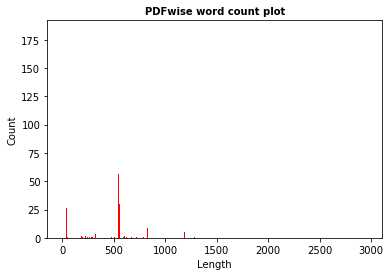

<Figure size 720x720 with 0 Axes>

In [23]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='red')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot', fontweight ="bold",fontsize=10)
plt.figure(figsize=(10, 10))
plt.show()

### 5.1) Manufacturer-Brochure

In [24]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Manufacturer' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)

            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
        # closing the pdf file object
        pdfFileObj.close()

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
 
© 2021 Tripp Lite. All rights reserved. All product and company names are trademarks or registered trademarks of their respective holders. Use of them does
not imply any affiliation with or endorsement by them. Tripp Lite has a policy of continuous improvement. Specifications are subject to change without notice.
Tripp Lite uses primary and third-party agencies to test its products for compliance with standards. See a list of Tripp Lite's testing agencies: 
https://www.tripplite.com/products/product-certification-agencies
Shipping Dimensions (hwd / cm) 13.21 x 34.29 x 20.57
Shipping Dimensions (hwd / in.) 5.20 x 13.50 x 8.10
Shipping Weight (kg) 17.57
Shipping Weight (lbs.) 38.73
Unit Dimensions (hwd / cm) 10.2 x 39.4 x 15.2
Unit Dimensions (hwd / in.) 4.0 x 6.0 x 15.5
Unit Weight (kg) 16.78
Unit Weight (lbs.) 37.0
ENVIRONMENTAL
Relative H

Xref table not zero-indexed. ID numbers for objects will be corrected.


Sony Micro Vault
Speed. Size. Capacity. Security. Style.
Micro Vault Tiny USM512H USM1GH USM2GH USM4GH
Capacity 512MB 1GB 2GB 4GB
Dimensions (mm) 14.5 x 2.7 x 30 14.5 x 2.7 x 30 14.5 x 2.7 x 30 14.5 x 2.7 x 30
Port type Type A USB port Type A USB port Type A USB port Type A USB port
Interface Hi-Speed USB Hi-Speed USB Hi-Speed USB Hi-Speed USB
Power Supply USB bus power USB bus power USB bus power USB bus power
Warranty 1 year 1 year 1 year 1 yearMICRO VAULT TINY
Micro Vault Tiny is ultra-compact, colourful and very stylish. It 
comes with its own stylish carry case equipped with clip and strap for safe transport. In addition it comes preloaded with Virtual Expander . Compatible with both Windows and Macintosh 
operating systems, Micro Vault Tiny has been developed to meet the growing needs of both mobile professionals and consumers.MICRO VAULT CLASSIC
Micro Vault Classic is very stylish, with a retractable USB connector that slides out conveniently from the beautiful piano black desig

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  172


************************************************     EXTRACTED TEXT       **********************************************************************
BP48V45ART2U EBM 
The Extended Battery Module offers extended run-times during power outages.
©2015 CyberPower Systems (USA), Inc. All rights reserved. CyberPower reserves the right to change, without prior notice, product offerings or specifications.GENERAL
Voltage 48V
Amperage 45A
BATTERY
Battery Type Sealed Lead-Acid
Battery Size 12V/7.2AH
Hot-Swappable Yes
Replacement Battery BB Battery - BP7-12
Battery Quantity 8
User Replaceable Yes
Typical Recharge Time 16 Hours
PHYSICAL
Rack Size 2U
Dimensions (WxHxD) (in.) 17.25 x 3.5 x 15.75
Weight (lbs.) 62
ENVIRONMENTAL
Operating Temperature 32°F to 95°F / 0°C to 35°C
Operating Relative Humidity 0% - 95% non-condensing
Storage Temperature 5°F to 113°F / -15°C to 45°C
Maximum Operating Elevation 10,000 ft / 3,000 m
Maximum Storage Elevation 50,000 ft / 15,000 m
CERTIFICATIONS
Sa

Xref table not zero-indexed. ID numbers for objects will be corrected.


Rechargeable
NiMH Battery
Works with XBOX 360, PS3, and Wii.TM TM TM
ON OFF
600mAH Ni-MA
Rechargable Battery Pack
Input : 5.0A
Output: 3.6A
Made in China 
CTA Digital, Inc. 49 South Second Street, Brooklyn, New York 11211
Tel. (718) 963-9845 | Toll Free (888) 733-4448 | Fax. (718) 384-3509                                            www.ctadigital.com
Back of Rockband Guitar
  Quantity       Width        Height           Depth           Weight             UPC Barcode
Packaging                1                      5.5                      8.75                     1.25           0.5                 656777 00031 8
Master                     40                   14.25                   12.5                      16.5                15.5              10656777000315
Wi-RBB
 GuitarThe
This Rechargeable NiMH Battery Pack fully replaces the need to constantly change AA Batteries that the 
RockBand Guitar quickly drains.  You won’t need to take out this battery; all you just do is connect the cab

Xref table not zero-indexed. ID numbers for objects will be corrected.


 
© 2021 Tripp Lite. All rights reserved. All product and company names are trademarks or registered trademarks of their respective holders. Use of them does
not imply any affiliation with or endorsement by them. Tripp Lite has a policy of continuous improvement. Specifications are subject to change without notice.
Tripp Lite uses primary and third-party agencies to test its products for compliance with standards. See a list of Tripp Lite's testing agencies: 
https://www.tripplite.com/products/product-certification-agencies
STANDARDS & COMPLIANCE
Certifications TAA Compliant
WARRANTY
Product Warranty Period (U.S. &
Canada)2-year limited warranty
Product Warranty Period
(International)1-year limited warranty
Product Warranty Period (Mexico) 1-year limited warranty
Product Warranty Period (Puerto
Rico)1-year limited warranty
3 / 3


************************************************     CLEANED TEXT       **********************************************************************
 2021 Tripp Li

Xref table not zero-indexed. ID numbers for objects will be corrected.


************************************************     EXTRACTED TEXT       **********************************************************************
MSRP PriceProduct 
NumberProduct Description UPC
New 59.95 27.61 TLRZR     MagniLever Vortex Matte Black Fits Razor HD, Clam                     094092200097
New 59.95 27.61 TLTL1     MagniLever Meopta Matte Black Fits TL-1, Clam                         094092200059
New 59.95 27.61 TLXTR     MagniLever Burris Matte Black Fits XTR, Clam                          094092200103
New 59.95 27.61 TL122     MagniLever Bushnell Elite Matte Black Fits E1224, Clam            094092200011
New 59.95 27.61 TL183     MagniLever Bushnell Elite Matte Black Fits 651832M, Clam          094092200066
New 7.95 3.74 SCT6      Scope-Tite Threadlocker 5ml Tube, Clam                          094092006101
Alum Ring/Base Combo
   22.95 10.62 CP40702   1" Medium Matte Rem 700 Series Alum, Detachable, Clam                  094092012225
   22.95 10.62 CP40704   1" Medium Mat

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Key Management Supplies
A.  Key File Insert and Pen
A Vel Key® file fits easily into a hanging file, three-ring 
binder, or briefcase. Each key file holds 22 VELCRO®-
backed key tags with up to six keys each. To help 
track missing keys, accountability tags affix to the VELCRO strip in place of a removed key. Three accountability tags and pen included. Pebble Beige.
Product No. Description 
04986 11
1⁄2"W x 1⁄4"D x 9"H
04985 12 Replacement Key Tags
B.  Portable Zippered Key Cases
Durable, textured vinyl Vel Key® portable zippered key 
cases transport organized keys easily. Keys always 
remain in position. Cases include VELCRO®-backed key 
tags that attach to sewn-in VELCRO strips. Rings hold up to six keys. Marking pen included.
Product No. Description 
04987  24 Key Tags, 7"W x 1"D x 8
3⁄8"H, 
Ebony Black
04988  48 Key Tags, 87⁄8"W x 1"D x 115⁄8"H, 
Ebony Black
04985  12 Replacement Key Tags, 
Pebble Beige
C.  Locking Key Cabinet
Metal cabinet with key lock holds 100 keys. Key index a

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  443


************************************************     EXTRACTED TEXT       **********************************************************************
Experience the Howard advantage.Q: How much does the HI-Care weigh?
A:  The cart, with complete power system, weighs approximately 150 
pounds. Weight varies slighty depending on accessories.
Q: Is the HI-Care hard to clean?
A:  No. Hard external surfaces make the HI-Care extremely easy to 
clean and maintain using a variation of bleach, water, and mild 
commercial abrasives. 
Q: Will I be able to integrate future hardware on the HI-Care?
A:  Yes. We realized the need to easily upgrade in the future, so we 
have engineered technology to assist you in upgrading as needed.
Q: Can I get my carts in a color of my choice?
A:  Yes. Since color plays an important role in cart configuration, we 
have designed our entire cart family with several accent colors for 
you to choose from. (See below.)
Warranty & Support
Choosing a warra

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  551


************************************************     EXTRACTED TEXT       **********************************************************************
Minuteman® XL and EXL External Battery Pack Specifications
© Copyright 2014, Para Systems, Inc. Product specifications are subject to change without notice.  
Minuteman, Endeavor, and EnterprisePlus are trademarks of Para Systems, Inc.
www.minutemanups.com | www.sizemyups.comPN-34000358 - 09-14
For EnterprisePlus LCD UPSModel No. VAh RatingBattery Module/
Config.Weight Rack Dimensions Compatible UPS ModelsCapacity vs.
XL Module
BP36RTXL 518.4VAh BM0033 55.0 lb3.5” x 17.3” x 17.0” 
(2U)E750RTXL2U, E1000RTXL2U, 
E1500RTXL2U, E1500RTXLT2U-
BP72RTXL 612VAh BM0034 55.0 lb3.5” x 17.3” x 17.0”
(2U)E2000RTXL2U, E3000RTXL2U,  
E3000RTXLT2U-
Extreme Runtime EXL Battery Packs
BP36RTEXL 1836VAh (18) 12V/8.5AH 127.9 lb5.2” x 17.3” x 26.8”
(3U)E750RTXL2U, E1000RTXL2U, 
E1500RTXL2U, E1500RTXLT2U3.50x XL Model
BP72RTEXL 1836VAh (18) 12V/8

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
BP240V30ART3U EBM 
The Extended Battery Module offers extended run-times during power outages.
©2015s CyberPower Systems (USA), Inc. All rights reserved. CyberPower reserves the right to change, without prior notice, product offerings or specifications.GENERAL
Voltage 240V
Amperage 30A
BATTERY
Battery Type Sealed Lead-Acid
Battery Size 12V/7.2AH
Hot-Swappable Yes
Replacement Battery RB1272X20
Battery Quantity 20
User Replaceable Yes
Typical Recharge Time 4 Hours
Built-in Charger Yes
Expansion Ready (Daisy-Chain)Yes - Power plugs for Module and 
Charger
PHYSICAL
Rack Size 3U
Mounting Hardware Included
Enclosure Construction Steel
Dimensions (WxHxD) (in.) 17.05 x 5.2 x 26
Dimensions (WxHxD) (mm.) 433 x 132 x 660
Weight (lbs.) 167.2
Weight (kg.) 76
Shipping Dimensions (WxHxD) 
(in.)23.62 x 14.76 x 35.43
Shipping Dimensions (WxHxD) 
(mm.)600 x 3

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  555


************************************************     EXTRACTED TEXT       **********************************************************************
Experience the Howard advantage.Q: How much does the HI-Care weigh?
A:  The cart, with complete power system, weighs approximately 150 
pounds. Weight varies slighty depending on accessories.
Q: Is the HI-Care hard to clean?
A:  No. Hard external surfaces make the HI-Care extremely easy to 
clean and maintain using a variation of bleach, water, and mild 
commercial abrasives. 
Q: Will I be able to integrate future hardware on the HI-Care?
A:  Yes. We realized the need to easily upgrade in the future, so we 
have engineered technology to assist you in upgrading as needed.
Q: Can I get my carts in a color of my choice?
A:  Yes. Since color plays an important role in cart configuration, we 
have designed our entire cart family with several accent colors for 
you to choose from. (See below.)
Warranty & Support
Choosing a warran

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  555


************************************************     EXTRACTED TEXT       **********************************************************************
BP36V60ART2U EBM 
The Extended Battery Module offers extended run-times during power outages.
©2015 CyberPower Systems (USA), Inc. All rights reserved. CyberPower reserves the right to change, without prior notice, product offerings or specifications.GENERAL
Voltage 36V
Amperage 60A
BATTERY
Battery Type Sealed Lead-Acid
Battery Size 12V/9AH
Hot-Swappable Yes
Battery Quantity 6
User Replaceable Yes
Typical Recharge Time 5 Hours
Built-in Charger Yes
Expansion Ready (Daisy-Chain) Yes
PHYSICAL
Rack Size 2U
Mounting Hardware Included
Enclosure Construction Steel
Dimensions (WxHxD) (in.) 17 x 3.5 x 16.9
Dimensions (WxHxD) (mm.) 433 x 88 x 430
Weight (lbs.) 50.6
Weight (kg.) 22.9
Shipping Dimensions (WxHxD) 
(in.)21.65 x 9.45 x 23.23
Shipping Dimensions (WxHxD) 
(mm.)550 x 240 x 590
Shipping Weight (lbs.) 65.34
Shipping Weight (k

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  443


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  159


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,


Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  752


************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-8906
www.enovatemedical.com
salesrequest @enovatemedical.com
©2014 Enovate Medical LLC. All Rights Reserved. Peripherals Not 
Included. All information is subject to change without notice.  *    Enovate Medical Reboot Cart works with selected computer devices.
**  Enovate Medical Cart power system has some components that are imported .MADE IN USAPOWER OPTIONS
An intelligent control panel is located at the caregiver’s fingertips providing immediate 
access to the cart’s battery alert, battery power button, battery LED fuel gauge, a 
work light and a laptop reboot button for select CPUs/laptops (Please contact your 
local representative to find out what CPUs/laptops are compatible).  
The Enovate Medical Medication Carts offer an array of safety features,

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PRODUCT 
SELECTION GUIDE
  Product / Feature LinkSprinterTest
AccessoryLinkRunner 
ATLinkRunner
G2LinkRunner
10GEtherScope
nXGAirCheck
G2AirMagnet
Survey PROAirMagnet
WiFi AnalyzerAirMagnet
Spectrum XT
Copper10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100 Mbps 
& 1/2.5/5/10 
Gbps  10/100 Mbps 
& 1/2.5/5/10 
Gbps   10/100/1000 
Mbps
Fiber 1 Gbps 1 Gbps 1/10 Gbps 1/10 Gbps
Wi-Fi Test  • • • • •
PoE Test Voltage only Voltage only Up to 30W Up to 90W Up to 90W Up to 90W Up to 30W
Default Gateway, DNS, IP 1 IP Target 1 IP Target 10 IP TargetUnlimited 
TargetsUnlimited 
TargetsUnlimited 
Targets1 IP Target
Line Rate Performance Test 10 Gbps 10 Gbps
Lanbert™ Media Qualification • •
Cable Open/Short/Length • • • • •
Wiremap & Toner • • • •
Network Discovery*  •* •
Packet Capture • • • • •
Remote View/ControlAndroid  
Apps  •* • •Windows 
AppsWindows 
AppsWindows 
Apps
Ethernet Support • •   
802.11 a/b/g/n/ac • •  • • •
802.11ax • Visibility Only • •
Wi-Fi Bands (2.4

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


GENERAL
  Automated Height Adjustment: 16" range of motion 
  Contoured front and rear handle
  Primary Work Surface size is: 21" w x 16" d
  Primary Work Surface document protector:  
16" w x 9.5" d
  Secondary slide out Work Surface size is: 8 ½" x 11"
  LED Keyboard light with auto shut-off
  Accommodates 8 ¾" d x 18" w keyboards
  Keyboard tray has left/right mouse pads, gel wrist rest, and easy access mouse holder
  Bin Accommodates barcode scanner heads up to 4x3"
  Casters: 4" precision bearing casters/2 locking
  T-track provides universal mounting point  for accessories
  Smooth, cleanable surfaces (no ribbing)
  2.5 ft hospital grade spiral cord extends to 8 ft
  Internal cable management
  Internal CPU storage: 15 ¼" w x 13 ¼" d x 3 ¼” h
MEDICATION ADMINISTRATION
  Electronic Keyless Entry
  PIN Code System: 0-9 digit, 128 codes per cart
  Network software for remote group PIN code update 
and audit
  Drawer Lock Time-out (seconds): 1-255 (default=120)
 Accommodates most bar

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  189


************************************************     EXTRACTED TEXT       **********************************************************************
94
Zido
shelVes
additional shelf •	Wood	shelves	attach	to	the	column	with	3	screws	and	hold	50	lbs.
•	Available	in	two	color	combinations:	 Slate	Blue	bracket	with	Cool	Grey	shelf	(SB/CG)	or	all	Cool	Grey	(CG/CG).
PRODUCT	 	 	 	 	 Width	 Depth	 Weight	 Part	 #	Price
Small	Additional	 Shelf		 	 	 	 	 17"	 10"	 7	 lbs.	 ZADSzz/xx	 $119.95
Medium	Additional	 Shelf	 	 	 	 	 22"	 13"	 10	 lbs.	 ZADMzz/xx	 $149.95
Large	Additional	 Shelf	 	 	 	 	 25"	 16.5"	 13	 lbs.	 ZADLzz/xx	 $199.95
	QuickShip	 available	for	Large	Shelf	in	Slate	Blue/Cool	 Grey	only.
base storage shelf •	Clamps	onto	the	base	of	only	the	25"	wide	Zido	carts	and	Pole	Cart,	comes	with	a	Strap	&	Buckle	Kit,	and	has	a	weight	capacity	of	50	lbs.	
•	Available	 in	Cool	Grey	(CG),	or	Slate	Blue	(SB)	with	textured	finish.
PRODUCT	 	 	 	 Width	 Depth	 Height	 Weight	 P

Xref table not zero-indexed. ID numbers for objects will be corrected.


DIST-1217_nov13ultrasound C art ultrasound C art
Height-adjustable Ultrasound Cart — Carry all your supplies on a compact, easy-to-steer 
cart that takes everything you need right to your patient. Squeeze the paddle to easily adjust the cart height 30”–40” so it’s comfortable. Use the built-in storage for gloves, gel, and more.  
5
large Casters —The 4” diameter 
twin-wheel casters (2 locking) 
travel easily over thresholds and 
directly to the point of care.large Probe Holder —  
Gives you a convenient spot to store probes.4adjustable Height — 
Set the height 30”–40” so it’s comfortable for 
patients and clinicians.1
4
1
5
32
Metal Bin — Store your gels, 
tissues, and other smaller 
items here for easy access.
3
Anthro P/N:  BZD02zz/CG430”-40”22"
15.25"
22.25”17”
18.75"2Contoured t op — The 1/2” high 
lip runs all the way around the cap shelf to keep your valuable 
ultrasound machine in place.
Color swatches
Metal Colors (zz)Slate Blue (SB) Cool Grey (CG)
laminate Color (xx)Cool Grey 

Xref table not zero-indexed. ID numbers for objects will be corrected.


 www.enovatemedical.com
Information contained in this document is subject to change without notice. This document is not part of a contract or license as may be expressly agreed. Enovate Medical 
is a registered trademark of Enovate Medical LLC. All product and company names herein may be trademarks of their registered owners. All rights reserved © 2013 
Enovate Medical LLC.  Our Emagination Stations are designed to engage children and stimulate their senses — hopefully 
leading to a faster recovery and a shorter, more enjoyable hospital stay. 
NOW AVAILABLE FOR BOTH MOBILE & WALL STATION LINES
How they feel affects how they heal.
Linda
www.emaginationstations.com 
Scan the QR code or visit the website to download FREE activity sheets for your 
pediatrics department featuring each of the Emagination Station characters.


************************************************     CLEANED TEXT       **********************************************************************
www enovatemedical com I

Xref table not zero-indexed. ID numbers for objects will be corrected.


 www.enovatemedical.com
Information contained in this document is subject to change without notice. This document is not part of a contract or license as may be expressly agreed. Enovate Medical 
is a registered trademark of Enovate Medical LLC. All product and company names herein may be trademarks of their registered owners. All rights reserved © 2013 
Enovate Medical LLC.  Our Emagination Stations are designed to engage children and stimulate their senses — hopefully 
leading to a faster recovery and a shorter, more enjoyable hospital stay. 
NOW AVAILABLE FOR BOTH MOBILE & WALL STATION LINES
How they feel affects how they heal.
Linda
www.emaginationstations.com 
Scan the QR code or visit the website to download FREE activity sheets for your 
pediatrics department featuring each of the Emagination Station characters.


************************************************     CLEANED TEXT       **********************************************************************
www enovatemedical com I

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


1152 Park Avenue
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-8906
www.enovatemedical.com
salesrequest @enovatemedical.com
©2013 Enovate Medical LLC. All Rights Reserved. Peripherals Not 
Included. All information is subject to change without notice.  071613*    Enovate Medical Cart works with selected computer devices.
**  Enovate Medical Cart power system has some components that are imported.MADE IN USA
POWER OPTIONS
An intelligent control panel is located at the caregiver’s fingertips providing immedi -
ate access to the cart’s battery alert, battery power button, battery LED fuel gauge, 
a work light and a laptop reboot button for select CPUs/laptops (Please contact your 
local representative to find out what CPUs/laptops are compatible).  
The Enovate Medical Medication Carts offer an array of safety features, including sup -
ply bins that are protected by a keyless electronic PIN code and a programmable auto 
lock.
SPECIFICATIONSDRAWER BINS
SMART TECHNOLOGY
Multiple opti

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
Offer Sustainability
Sustainable  offer status Green  Premium product
REACh  Regulation REACh Declaration
EU RoHS Directive Pro-active  compliance (Product out of EU RoHS legal scope)
EU RoHS Declaration
Environmental  Disclosure Product Environmental Profile
Circularity  Profile End of Life Information
Take-back Take-back  program available
Contractual warranty
Warranty 30 days
2



************************************************     CLEANED TEXT       **********************************************************************
Offer Sustainability Sustainable offer status Green Premium product REACh Regulation REACh Declaration EU RoHS Directive Pro active compliance Product out of EU RoHS legal scope EU RoHS Declaration Environmental Disclosure Product Environmental Profile Circularity Profile End of Life Information Take back program availabl

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
T7 and the Environment
A Sustainable Solution 
Designed with minimal parts and with few 
manufacturing processes, the T7 contains eco-friendly 
aluminum and steel.
www.humanscalehealthcare.com
800.400.0625Creating a more comfortable place to work
HST7NPA0315


************************************************     CLEANED TEXT       **********************************************************************
T7 and the Environment A Sustainable Solution Designed with minimal parts and with few manufacturing processes the T7 contains eco friendly aluminum and steel www humanscalehealthcare com 800 400 0625Creating a more comfortable place to work HST7NPA0315
Word Count =  37


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  159


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  129


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,
 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  159


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,
     barcode scanner clip, vital signs monitor, equipment mounts, glove  
     and wipes dispensers, sharpes holders and cup and bottle holders
•   Antimicrobial and 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  159


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
Where to Buy:
U.S. Distributor List: http://www.eotech-inc.com/merchantlist.php 
For U.S. military inquiries call 866-509-2044
All specifications are subject to change. 
© 2014 Master Catalog V.1transform your  arsenal.
1201 E. Ellsworth Road, Ann Arbor, MI 48108  888.EOTHOLO  www.eotech-inc.com
© 2014, L-3 EOTech An            Communications Company


************************************************     CLEANED TEXT       **********************************************************************
Where to Buy U S Distributor List http www eotech inc com merchantlist php For U S military inquiries call 866 509 2044 All specifications are subject to change 2014 Master Catalog V 1transform your arsenal 1201 E Ellsworth Road Ann Arbor MI 48108 888 EOTHOLO www eotech inc com 2014 L 3 EOTech An Communications Company
Word Count =  57


***************

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


AnthroCart 2
ANTHROCART 218PRODUCT  Width (A) Width (B) Width (C) depth (d) depth (E) Weight Part # Price
EQUIPMENT CART  25.25" 24" 21" 22" 12"  18 lbs. 107xx $89.95  
PRODUCT   Width (A) Width (B) Width (C) depth (d) Weight Part # Price
ULTRACoMPACT CART   25.25" 23.75" 21.25" 15.75" 15 lbs. 138xx $84.95  
shelf - metal base • Make use of the space at the bottom of your Cart for your hardware, books or manuals.
• Comes with a strap and buckle to hold your equipment. Rests on the base tube. • Holds up to 75 pounds.• When installed on a cart with 2.375" casters, the shelf is 5" above the floor.
PRodUCT     Width depth Weight Part# Price
Metal Base Shelf for UltraCompact Cart    24" 14" 9 lbs. MBUCzz $99.95
Metal Base Shelf for 24" wide AnthroCart II    24" 14" 9 lbs. MB2414zz $99.95
 QuickShip available for Metal Base Shelf for 24"w AnthroCart 2 in Cool Grey (MB2414CG) only.
wire basket shelf - minicart
• Attaches to the legs of the MiniCart at any height. open wire weave keeps content

Xref table not zero-indexed. ID numbers for objects will be corrected.


www.howard-medical.com  | 877.856.6441Experience the Howard Advantage
36 HOWARD DRIVE
ELLISVILLE, MISSISSIPPI 39437
(888) 912-3151
09012010Howard Medical is your 
total point-of-care solutions 
provider. Our product offerings 
include revolutionary medical carts; 
specialized hardware technologies that 
are vital to EMR, CPOE, PACS, and other 
health-related systems. And by partnering 
with like-minded technology innovators, we also 
offer rugged notebooks, tablets, and flat panel wall 
mounts. We provide healthcare personnel with real-world 
solutions so they can focus on what matters most—patients.A simple solution to
mobile computing


************************************************     CLEANED TEXT       **********************************************************************
www howard medical com 877 856 6441Experience the Howard Advantage 36 HOWARD DRIVE ELLISVILLE MISSISSIPPI 39437 888 912 3151 09012010Howard Medical is your total point of care solutions provider Our product off

Xref table not zero-indexed. ID numbers for objects will be corrected.


www.howard-medical.com  | 877.856.6441Experience the Howard Advantage
36 HOWARD DRIVE
ELLISVILLE, MISSISSIPPI 39437
(888) 912-3151
09012010Howard Medical is your 
total point-of-care solutions 
provider. Our product offerings 
include revolutionary medical carts; 
specialized hardware technologies that 
are vital to EMR, CPOE, PACS, and other 
health-related systems. And by partnering 
with like-minded technology innovators, we also 
offer rugged notebooks, tablets, and flat panel wall 
mounts. We provide healthcare personnel with real-world 
solutions so they can focus on what matters most—patients.A simple solution to
mobile computing


************************************************     CLEANED TEXT       **********************************************************************
www howard medical com 877 856 6441Experience the Howard Advantage 36 HOWARD DRIVE ELLISVILLE MISSISSIPPI 39437 888 912 3151 09012010Howard Medical is your total point of care solutions provider Our product off

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  93


************************************************     EXTRACTED TEXT       **********************************************************************
Vertiv.com   |  Vertiv Headquarters,  1050 Dearborn Drive, Columbus, OH, 43085, USA
© 2020 Vertiv Group Corp. All rights reserved. Vertiv™ and the Vertiv logo are trademarks or registered trademarks of Vertiv Group Corp. All other names and logos referred to are trade names, trademarks or registered trademarks of their respective owners. While every 
precaution has been taken to ensure accuracy and completeness here, Vertiv Group Corp. assumes no responsibility, and disclaims all liability, for damages resulting from use of this information or for any errors or omissions. Specifications, rebates and other promotional 
offers are subject to change at Vertiv’s sole discretion upon notice.
SL-55000 (R03/20)


************************************************     CLEANED TEXT       ***********************************************

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  159


************************************************     EXTRACTED TEXT       **********************************************************************
1341 San Mateo Ave, 
South San Francisco, CA 94080.Tel: 800-910-2862, 650-989-5100, 
fax: 650-875-0129www.atncorp.com
e-mail: sales@atncorp.com, info@atncorp.comThermal ImagIng Weapon SIghT
1341 San Mateo Ave, 
South San Francisco, CA 94080.Tel: 800-910-2862, 650-989-5100, 
fax: 650-875-0129www.atncorp.com
e-mail: sales@atncorp.com, info@atncorp.com
DISpla Y Color moDeSreTICle ColorS reTICle  paTTernSThor-336 3X 60 hz
SpeCIFICa TIonS
Thor336-3x-60 hz
Item # TIWS mT333 a
Sensor (microbolometer) 336x256
Frame rate 60 h z
material VoX
Image Size (output resolution) 800x600
Video output Digital n TSC / pal
DisplayColor ole D matrix, SV ga< 800x600 
Color background + color reticules
Thermal Sensitivity <50mK
Spectral response 7-14 μm
Field of View ( h x V) 9°x 7°
eye r elief 28 mm
optical magnification 3x
e-Zoom 6x, 12x
Diamet

Xref table not zero-indexed. ID numbers for objects will be corrected.


1341 San Mateo Ave, 
South San Francisco, CA 94080.Tel: 800-910-2862, 650-989-5100, 
fax: 650-875-0129www.atncorp.com
e-mail: sales@atncorp.com, info@atncorp.comThermal ImagIng Weapon SIghT
1341 San Mateo Ave, 
South San Francisco, CA 94080.Tel: 800-910-2862, 650-989-5100, 
fax: 650-875-0129www.atncorp.com
e-mail: sales@atncorp.com, info@atncorp.com
DISpla Y Color moDeSreTICle ColorS reTICle  paTTernSThor-336 1.5X 60 hz
SpeCIFICa TIonS
Thor336-1.5x-60 hz
Item # TIWS mT331a
Sensor (microbolometer) 336x256
Frame rate 60 h z
material VoX
Image Size (output resolution) 800x600
Video output Digital n TSC / pal
DisplayColor ole D matrix, SV ga< 800x600 
Color background + color reticules
Thermal Sensitivity <50mK
Spectral response 7-14 μm
Field of View ( h x V) 21°x 16°
eye r elief 28 mm
optical magnification 1.5x
e-Zoom 3x, 6x, 12x
Diameter of exit pupil 14 mm
Distance of the human detection  
(w/o zoom)--- m
Distance of the human recognition --- m
reticle multiple r eticles to Choose From


Xref table not zero-indexed. ID numbers for objects will be corrected.


1152 Park Avenue
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-8906
www.enovatemedical.com
salesrequest @enovatemedical.com
©2014 Enovate Medical LLC. All Rights Reserved. Peripherals Not 
Included. All information is subject to change without notice.  *    Enovate Medical Reboot Cart works with selected computer devices.
**  Enovate Medical Cart power system has some components that are imported .MADE IN USAPOWER OPTIONS
An intelligent control panel is located at the caregiver’s fingertips providing immediate 
access to the cart’s battery alert, battery power button, battery LED fuel gauge, a 
work light and a laptop reboot button for select CPUs/laptops (Please contact your 
local representative to find out what CPUs/laptops are compatible).  
The Enovate Medical Medication Carts offer an array of safety features, including 
supply bins that are protected by a keyless electronic PIN code and a programmable 
auto lock.
SPECIFICATIONSDRAWER BINS
SMART TECHNOLOGY
Multiple options

Xref table not zero-indexed. ID numbers for objects will be corrected.


1152 Park Avenue
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-8906
www.enovatemedical.com
salesrequest @enovatemedical.com
©2014 Enovate Medical LLC. All Rights Reserved. Peripherals Not 
Included. All information is subject to change without notice.  *    Enovate Medical Reboot Cart works with selected computer devices.
**  Enovate Medical Cart power system has some components that are imported .MADE IN USAPOWER OPTIONS
An intelligent control panel is located at the caregiver’s fingertips providing immediate 
access to the cart’s battery alert, battery power button, battery LED fuel gauge, a 
work light and a laptop reboot button for select CPUs/laptops (Please contact your 
local representative to find out what CPUs/laptops are compatible).  
The Enovate Medical Medication Carts offer an array of safety features, including 
supply bins that are protected by a keyless electronic PIN code and a programmable 
auto lock.
SPECIFICATIONSDRAWER BINS
SMART TECHNOLOGY
Multiple options

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


1152 Park Avenue
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-8906
www.enovatemedical.com
salesrequest @enovatemedical.com
©2014 Enovate Medical LLC. All Rights Reserved. Peripherals Not 
Included. All information is subject to change without notice.  *    Enovate Medical Reboot Cart works with selected computer devices.
**  Enovate Medical Cart power system has some components that are imported .MADE IN USAPOWER OPTIONS
An intelligent control panel is located at the caregiver’s fingertips providing immediate 
access to the cart’s battery alert, battery power button, battery LED fuel gauge, a 
work light and a laptop reboot button for select CPUs/laptops (Please contact your 
local representative to find out what CPUs/laptops are compatible).  
The Enovate Medical Medication Carts offer an array of safety features, including 
supply bins that are protected by a keyless electronic PIN code and a programmable 
auto lock.
SPECIFICATIONSDRAWER BINS
SMART TECHNOLOGY
Multiple options

Xref table not zero-indexed. ID numbers for objects will be corrected.


T7 and the Environment
A Sustainable Solution 
Designed with minimal parts and with few 
manufacturing processes, the T7 contains eco-friendly 
aluminum and steel.
www.humanscalehealthcare.com
800.400.0625Creating a more comfortable place to work
HST7NPA0315


************************************************     CLEANED TEXT       **********************************************************************
T7 and the Environment A Sustainable Solution Designed with minimal parts and with few manufacturing processes the T7 contains eco friendly aluminum and steel www humanscalehealthcare com 800 400 0625Creating a more comfortable place to work HST7NPA0315
Word Count =  37


************************************************     EXTRACTED TEXT       **********************************************************************
T7 and the Environment
A Sustainable Solution 
Designed with minimal parts and with few 
manufacturing processes, the T7 contains eco-friendly 
aluminum and steel.
www.humanscale

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


LO7-080
REV. 2/14 
© 2014 InterMetro Industries Corporation, Wilkes-Barre, PA 18705The Emerson logo is a trademark and a service mark of Emerson Electric Company.1.800.992.1776Check out the completely redesigned, all-new     
www.metro.com


************************************************     CLEANED TEXT       **********************************************************************
LO7 080 REV 2 14 2014 InterMetro Industries Corporation Wilkes Barre PA 18705The Emerson logo is a trademark and a service mark of Emerson Electric Company 1 800 992 1776Check out the completely redesigned all new www metro com
Word Count =  39


************************************************     EXTRACTED TEXT       **********************************************************************
T7 and the Environment
A Sustainable Solution 
Designed with minimal parts and with few 
manufacturing processes, the T7 contains eco-friendly 
aluminum and steel.
www.humanscalehealthcare.com
800.400.0625Creating a more co

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-8906
www.enovatemedical.com
salesrequest @enovatemedical.com
©2014 Enovate Medical LLC. All Rights Reserved. Peripherals Not 
Included. All information is subject to change without notice.  *    Enovate Medical Reboot Cart works with selected computer devices.
**  Enovate Medical Cart power system has some components that are imported .MADE IN USAPOWER OPTIONS
An intelligent control panel is located at the caregiver’s fingertips providing immediate 
access to the cart’s battery alert, battery power button, battery LED fuel gauge, a 
work light and a laptop reboot button for select CPUs/laptops (Please contact your 
local representative to find out what CPUs/laptops are compatible).  
The Enovate Medical Medication Carts offer an array of safety features, including 
supply 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,
     barcode scanner clip, vital signs monitor, equipment mounts, glove  
     and wipes dispensers, sharpes holders and cup and bottle holders
•   Antimicrobial and 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
www.howard-medical.com  | 877.856.6441Experience the Howard Advantage
36 HOWARD DRIVE
ELLISVILLE, MISSISSIPPI 39437
(888) 912-3151Howard Medical is your 
total point-of-care solutions 
provider. Our product offerings 
include revolutionary medical carts; 
specialized hardware technologies that 
are vital to EMR, CPOE, PACS, and other 
health-related systems. And by partnering 
with like-minded technology innovators, we also 
offer rugged notebooks, tablets, and flat panel wall 
mounts. We provide healthcare personnel with real-world 
solutions so they can focus on what matters most—patients.A simple solution to
mobile computing
09012010


************************************************     CLEANED TEXT       **********************************************************************
www howard medical com 877 856 6441Experience the Howard Advant

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,
     barcode scanne

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,
     barcode scanne

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


www humanscale com 800 400 0625 ext 6Creating a more comfortable place to work Security Safety Unique security system protects hardware against theft Front locking casters Customizable spill protection for laptop computers Fan free power system helps limit spread of contagions Warranty Five year warranty on all parts with the following exceptions Power supply three 3 years Battery up to one 1 year Enrollment in optional battery replacement program available at time of purchase Best service and warranty program in the industry Additional Details Inset work surface keeps objects from falling Utility container positioned for easiest accessibility Cable management system Optional add ons include peripheral shelves printer shelves barcode scanner clip vital signs monitor equipment mounts glove and wipes dispensers sharpes holders and cup and bottle holders Antimicrobial and easy clean finishes Improved power access and wire management at head assembly Custom writing surfaces availableSpecif

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  159


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  93


************************************************     EXTRACTED TEXT       **********************************************************************
www.humanscale.com
800.400.0625 ext. 6Creating a more comfortable place to work
Security & Safety
•   Unique security system protects hardware against theft
•   Front-locking casters
•   Customizable spill protection for laptop computers
•   Fan-free power system helps limit spread of contagions
Warranty
•   Five-year warranty on all parts with the following exceptions:
       – Power supply: three (3) years
       – Battery: up to one (1) year*
       – Enrollment in optional battery replacement program available at  
          time of purchase
       – Best service and warranty program in the industry
Additional Details
•   Inset work surface keeps objects from falling
•   Utility container positioned for easiest accessibility 
•   Cable management system
•   Optional add-ons include peripheral shelves, printer shelves,
 

Xref table not zero-indexed. ID numbers for objects will be corrected.


The Mobile Medical s torage Cart with Monitor and PC Mount shall be a Peerless-AV model HCC501 and shall be located where indicated on the plans.
Assembly and installation shall be done according to instructions provided by the manufacturer.
LIT-1179packagE siZE (W x h x d) packagE ship WEight packagE upc codE packagE contEnts units in packagE
hcc501Box 1:
7.25” x 30.00” x 15.00”
(946 x 762 x 381mm)
Box 2:
57.50” x 2.75” x 2.75”
(1461 x 70 x 70mm)99.5lb (45kg) 735029300588Medical storage cart, 3 
storage bins, (1) six outlet 
surge protector strip with 
10ft cord,  display mounting 
harware, PC strap kit, (2) 
magnetic hanging hooks, & 
assembly instructions1Package Specifications
Architect SpecificationsdimEnsions (W x h x d) product WEight Load c apacity Finish       a VaiLaBLE coL ors
hcc50119.24” x 62.19” x 29.90”
(489 x 1580 x 759mm)88.3lb (40.1kg) 25lb (11kg) Matte Antimicrobial* whiteProduct SpecificationsModel Numbers Warranty :   Limited 5-year
All dimensions = inch (mm) hcc50

PdfReadError: PDF starts with '<html', but '%PDF-' expected

[218, 551, 551, 587, 188, 178, 182, 168, 133, 218, 133, 224, 215, 99, 120, 193, 180, 120, 238, 172, 157, 192, 187, 398, 263, 174, 206, 210, 171, 222, 212, 125, 167, 208, 152, 190, 278, 218, 243, 571, 476, 161, 190, 1, 444, 555, 551, 551, 551, 551, 201, 225, 555, 555, 555, 157, 555, 216, 219, 160, 444, 160, 160, 160, 160, 160, 753, 753, 753, 716, 202, 278, 160, 82, 646, 716, 185, 190, 490, 190, 128, 128, 128, 753, 753, 185, 37, 444, 444, 444, 444, 444, 444, 444, 444, 444, 444, 444, 444, 444, 49, 160, 551, 37, 160, 195, 133, 160, 160, 124, 160, 130, 160, 69, 160, 160, 109, 190, 251, 160, 160, 160, 160, 57, 160, 271, 37, 160, 93, 93, 93, 108, 160, 160, 326, 329, 716, 716, 716, 37, 37, 37, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 37, 37, 160, 716, 160, 160, 37, 93, 37, 160, 93, 160, 37, 37, 37, 160, 160, 160, 160, 93, 160, 160, 37, 340, 37, 186, 210]


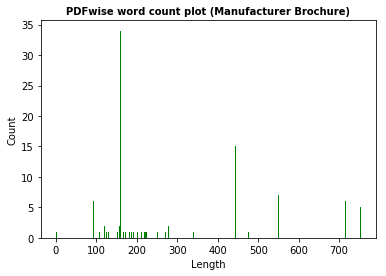

In [67]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Manufacturer' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='green')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Manufacturer Brochure)', fontweight ="bold",fontsize=10)
plt.show()

### 5.2) User-Manual

In [26]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'User-Manual' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)

            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
    # closing the pdf file object
    pdfFileObj.close()

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
Copyright Information
No part of this manual, including the products and software described in it, may be reproduced, trans-
mitted, transcribed, stored in a retrieval system, or translated into any language in any form or by any means, except documentation kept by the purchaser for backup purposes, without the express written permission of ASUSTeK COMPUTER INC. (“ASUS”).
ASUS PROVIDES THIS MANUAL “AS IS” WITHOUT WARRANTY OF ANY KIND, EITHER 
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE IMPLIED WARRANTIES OR CONDITIONS OF MERCHANTABILITY OR FITNESS FOR A PARTICULAR PURPOSE. IN NO EVENT SHALL ASUS, ITS DIRECTORS, OFFICERS, EMPLOYEES OR AGENTS BE LIABLE FOR ANY INDIRECT, SPECIAL, INCIDENTAL, OR CONSEQUENTIAL DAMAGES (INCLUDING DAMAGES FOR LOSS OF PROFITS, LOSS OF BUSINESS, LOSS OF USE OR DATA, INTER-RUPTION OF BUSINESS AND THE LIKE), E

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


  
 
10 
Copyright © 20 13 CyberPower Systems, Inc.  
Conformanc e Approvals  
 
FCC Notice  
This device complies with part 15 of the FCC Rules. Operation is subject to the 
following two conditions: (1) This device may not cause harmful interference, 
and (2) this device must accept any interference received, including interference 
that may cause undesired operation.  
 
WARNING!! This equipment has been tested and found to comply with the limits for a Class A 
digital device, pursuant to part 15 of the  FCC Rules. These limits are designed to provide 
reasonable protection ag ainst harmful interference when the equipment is  operated in a 
commercial environment. This equipment generates, uses, and can radiate radio frequency 
energy and, if not  installed and used in accordance with the instruction manual, may cause 
harmful interf erence to radio communications. Operation of this equipment in a residential area 
is likely to cause harmful interference in which case the user will 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


72
DE


************************************************     CLEANED TEXT       **********************************************************************
72 DE
Word Count =  2


************************************************     EXTRACTED TEXT       **********************************************************************
 
 11 
  Contacting APC 
In the USA … Outside the USA … 
Refer to the APC web site, 
www.apc.com/support .  Refer to the APC web site, www.apc.com . Select the appropriate 
country from the country sel ection field. Select the Support  tab at the 
top of the web page.  
Limited Warranty 
American Power Conversion (APC) warrants its pr oducts to be free from defects in materials and 
workmanship for a period of two years from the date of purchase. Its obligation under this warranty 
is limited to repairing or replacing, at its own sole option, any such defective products. To obtain service under warranty you must obtain a Return ed Material Authorization (RMA) number from 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


CTA Digital - Innovative Accessories
Product Name: DELUXE POWER GRIP for Nintendo 3DS
 Product Model: 3DS-DPG
Thank you for choosing CTA Digital's product. We hope that you will enjoy using it.
Please follow the guidelines and instructions as laid out in this instruction manual.
ON/OFF 
Battery power switch
Console release
buttonIntegrated Stand
and 3DS game holder
LED Power
indicator lightGrooves for
comfortable grip
How to set up the power grip and charge your 3DS
1.Take out the accessories from the packaging. 2. Place the 3DS console into its holder securely and make sure all the pins connect well with your 3DS. 3. You can now charge your 3DS with the power grip by switching it “ON.”4. To remove the 3DS, simply press the release button on the back side of the power grip and remove it from the holder. 
How to charge the power grip
1. Plug in the included USB cable, your original 3DS AC adapter or other DC adaptor into the 4.6 in. socket on the back side of the power grip. 2. Now you 

Xref table not zero-indexed. ID numbers for objects will be corrected.


- The BG-7D battery grip was intended for use with Canon EOS 7D dSLR Cameras.
- Please only operate this device with the batteries and battery magazines men-   tioned in this manual. The BG-7D is compatible with LP-E6 equivalent Li-Ion bat   tery packs, Ni-MH or Alkaline AA batteries, and the included battery magazines.
- To prevent electrical shorts caused by metal objects touching the Metal Con- 
  tacts of the BG-7D, please place the (1) Contact Cap over the (2) Control Contacts  
  when the BG-7D is not in use. - Should you notice any smoke, or an unusual smell or noise from the BG-7D,    please discontinue use, as there may be a problem with the internal electrical    circuitry. After removing your batteries, contact the retailer or manufacturer for    full support. (3 Year Warranty)Cautions
Product Specifications
Power Source: One or two LP-E6 equivalent rechargeable Li-Ion Battery packs ; 
six Alkaline, Ni-MH Rechargeable AA Batteries, or NiZn AA BatteriesBattery Life: Approxima

XRef object at 1316433 can not be read, some object may be missing
XRef object at 1316433 can not be read, some object may be missing
XRef object at 1316433 can not be read, some object may be missing
XRef object at 1316433 can not be read, some object may be missing




************************************************     EXTRACTED TEXT       **********************************************************************
 
Copyright ©  20 11 CyberPower Systems, Inc.  CONFORMANCE APPROVAL S 
 
 
11  
FCC Notice  
This device complies with part 15 of the FCC Rules. Operation is subject to the following two conditions: (1) This device may not cause 
harmful interference, and (2) this device must accept any interference that may cause undesired operation.  
 
WARNING!!  This equipment has been tested and found to comply with the limits for a Class A digital device, pursuant to part 15 of the F CC Rules. These 
limits are designed to provide reasonable protection against harmful interference when the equipment is operated i n a commercial environment. This 
equipment generates, uses, and can radiate radio frequency energy and, if not installed and used in accordance with the instr uction manual, may cause 
harmful interference to radio communications. Operation o

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


  
 
8 
Copyright ©  20 12 CyberPower Systems, Inc.  
 Please be prepared to provide a description of the defect and when it happened (if 
available).  
Fine print  
The application of the United Nations Convention of Contracts for the International Sale of 
Goods is expressly excluded.  
CyberPower is the warrantor under this Limited Warranty.  
Conformance Approvals  
 
FCC Notice  
This device complies with part 15 of the FCC Rules. Operation is subject to 
the following two conditions: (1) This device may not cause harmful 
interference, and (2) this device must accept an y interference that may cause 
undesired operation.  
 
WARNING!! This equipment has been tested and found to comply with the limits for a Class B 
Digital Device, pursuant to Part 15 of the FCC Rules.  These limits are designed to provide 
reasonable protection  against harmful interference in residential installation.  This equipment 
generates, uses and can radiate radio frequency energy and, if not installed 

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

XRef object at 1545210 can not be read, some object may be missing
XRef object at 1545210 can not be read, some object may be missing
XRef object at 1545210 can not be read, some object may be missing
XRef object at 1545210 can not be read, some object may be missing


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Copyright © 2022 Cyber Power Systems, Inc.CONFORMANCE APPROVAL S 
13 FCC Notice  
This device complies with part 15 of the FCC Rules. Operation is subject to the following two conditions: (1) This device may  not cause 
harmful interference, and (2) this device must accept any interference that may cause unde sired operation.
For BP72V60ART2U  Online EBM : 
WARNING!!  This equipment has been tested and found to comply with the limits for a Class A  digital device, pursuant to part 15 of the FCC Rules. These 
limits are designed to provide reasonable protection against harmful interference when the equipment is operated in a commerc ial environment. This 
equipment generates, uses, and can radiate radio  frequency energy and, if not installed and used in accordance with the instruction manual, may cause 
harmful interference to radio communications. Operation of this equipment in a residential area is likely to cause harmful in terference in which case the user 
will be required to corr

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Step 1: Please color Linda in
Step 3: Fold the DASHED lines and SOLID black tabs
Step 4: Glue or tape the SOLID black tabs to help Linda take shapeStep 2: Have an adult help you cut along the SOLID black lines
Step 5: Take a photo of Linda and post it to Instagram or Twitter #enovatemedical Copy this sheet for your pediatrics 
department! Download FREE activity 
sheets of Linda’s friends at 
emaginationstations.com!
Fold SOLID black tabs & use them to 
glue or tape Linda together
www .enovatemedical. com
Information contained in this document is subject to change without notice. T his document is not part of a contract or licen se as may be expressly agreed. Enovate is a r egistered 
trademark of EnovateIT LLC. All product and company names herein may be trademarks of their registered owners. All rights res erved © 2 013 EnovateIT LLC.  043013emaginationstations.com



************************************************     CLEANED TEXT       **********************************************

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  27


************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical.com
support @enovatemedical.com
©2013 Enovate Medical LLC. All Rights 
Reserved


************************************************     CLEANED TEXT       **********************************************************************
1152 Park Avenue Murfreesboro TN 37129 p 888 909 8930 f 615 896 1652 www enovatemedical com support enovatemedical com 2013 Enovate Medical LLC All Rights Reserved
Word Count =  27


************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical.com
support @enovatemedical.com
©2013 Enovate Medical LLC. All Rights 
Reserved


**********

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical.com
support @enovatemedical.com
©2013 Enovate Medical LLC. All Rights 
Reserved


************************************************     CLEANED TEXT       **********************************************************************
1152 Park Avenue Murfreesboro TN 37129 p 888 909 8930 f 615 896 1652 www enovatemedical com support enovatemedical com 2013 Enovate Medical LLC All Rights Reserved
Word Count =  27


************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical.com
support @enovatemedical.com
©2013 Enovate Medical LLC. All Rights 
Reserved


************************************************     CLEANED TEXT       **********************************************************************
1152 Park Avenue Murfreesboro TN

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical.com
support @enovatemedical.com
©2013 Enovate Medical LLC. All Rights 
Reserved


************************************************     CLEANED TEXT       **********************************************************************
1152 Park Avenue Murfreesboro TN 37129 p 888 909 8930 f 615 896 1652 www enovatemedical com support enovatemedical com 2013 Enovate Medical LLC All Rights Reserved
Word Count =  27


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.





************************************************     CLEANED TEXT       **********************************************************************

Word Count =  0


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.





************************************************     CLEANED TEXT       **********************************************************************

Word Count =  0


************************************************     EXTRACTED TEXT       **********************************************************************
Copyright © 2004, Tripp Lite.Manuel de l'utilisateur
Cartouche de Batterie de
Remplacement (Replacement Battery Cartridge) (R.B.C.)
1111 W. 35th Street, Chicago, IL, 60609  Customer Support: (773) 869-1234  www.tripplite.comInstructions de sécurité importantes 
! Conservez ces instructions !
TInscrivez-vous en ligne aujourd'hui ! Vous pouvez gagner 
produit Tripp Lite GRATUIT ! www.tripplite.com/warranty
Félicitations ! V otre Cartouche de Batterie de Remplacement (Replacement
Battery Cartridge) à hautes performances et de longue durée (R.B.C.) neuve,sélectionnée de manière appropriée, est conçue pour prolonger la durée deservice de votre système d'onduleur. Toutes les R.B.C. son

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


1111 W. 35th Street, Chicago, IL 60609 USA • www.tripplite.com/support
14-02-168 • 93-2215_revBManual del propietario Manuel de l’utilisateur
¡INSTRUCCIONES DE SEGURIDAD IMPORTANTES!  
¡GUARDE ESTAS INSTRUCCIONES!INSTRUCTIONS DE SÉCURITÉ IMPORTANTES !  
CONSERVEZ CES INSTRUCTIONS !Cartucho de batería de reemplazo (R.B.C.) Cartouche de Batterie de Remplacement 
(Replacement Battery Cartridge) (R.B.C.)
¡Felicitaciones! Su cartucho de batería de reemplazo (R.B.C). de alto rendimiento y larga 
duración, apropiadamente escogido, está diseñado para prolongar la vida de su sistema UPS. 
Todos los R.B.C. son regulados por válvula y emplean fabricación a prueba de derrames. No se 
requiere ningún manejo especial. Las cubiertas del R.B.C. (fabricadas de plástico ABS, estireno 
o polipropileno) son no conductivas y tienen una alta resistencia al impacto, a la vibración, a 
las sustancias químicas y al calor. Las técnicas de diseño de última tecnología y los procesos 
de producción de alta calidad

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  34


************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical.com
support @enovatemedical.com
©2013 Enovate Medical LLC. All Rights 
Reserved. All content subject to change 
without notice.


************************************************     CLEANED TEXT       **********************************************************************
1152 Park Avenue Murfreesboro TN 37129 p 888 909 8930 f 615 896 1652 www enovatemedical com support enovatemedical com 2013 Enovate Medical LLC All Rights Reserved All content subject to change without notice 
Word Count =  34


************************************************     EXTRACTED TEXT       **********************************************************************
1152 Park Avenue 
Murfreesboro, TN 37129
p. (888)909-8930  f. (615)896-1652
www.enovatemedical

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


368. Хранение и техническое обслуживание
9. ГарантияХранение
Батарейный шкаф должен храниться в чистом и защищенном месте при температуре менее 40°C и относительной влажности менее 90%  
(без образования конденсата). По возможности храните батарейный шкаф в его заводской транспортной упаковке. Перед началом 
использования батарей следует произвести их зарядку в течение как минимум 24 часов. Не рассчитывайте на то, что подключенное 
оборудование будет обеспечено питанием от батарейного шкафа до момента полной зарядки батарей.  
Примечание.  В случае нахождения ИБП в выключенном состоянии на протяжении длительного периода времени его следует периодически 
включать с целью обеспечения возможности подзарядки батарей. ИБП должен включаться с целью подзарядки батарей не менее чем на 24 
часа непрерывной работы каждые 3 месяца. Невыполнение требования относительно периодической подзарядки батарей может нанести им 
необратимый вред.
Сервисное обслуживание
На продукцию компании Tripp Lite распр

Xref table not zero-indexed. ID numbers for objects will be corrected.


368. Хранение и техническое обслуживание
9. ГарантияХранение
Батарейный шкаф должен храниться в чистом и защищенном месте при температуре менее 40°C и относительной влажности менее 90%  
(без образования конденсата). По возможности храните батарейный шкаф в его заводской транспортной упаковке. Перед началом 
использования батарей следует произвести их зарядку в течение как минимум 24 часов. Не рассчитывайте на то, что подключенное 
оборудование будет обеспечено питанием от батарейного шкафа до момента полной зарядки батарей.  
Примечание.  В случае нахождения ИБП в выключенном состоянии на протяжении длительного периода времени его следует периодически 
включать с целью обеспечения возможности подзарядки батарей. ИБП должен включаться с целью подзарядки батарей не менее чем на 24 
часа непрерывной работы каждые 3 месяца. Невыполнение требования относительно периодической подзарядки батарей может нанести им 
необратимый вред.
Сервисное обслуживание
На продукцию компании Tripp Lite распр

Xref table not zero-indexed. ID numbers for objects will be corrected.


368. Хранение и техническое обслуживание
9. ГарантияХранение
Батарейный шкаф должен храниться в чистом и защищенном месте при температуре менее 40°C и относительной влажности менее 90%  
(без образования конденсата). По возможности храните батарейный шкаф в его заводской транспортной упаковке. Перед началом 
использования батарей следует произвести их зарядку в течение как минимум 24 часов. Не рассчитывайте на то, что подключенное 
оборудование будет обеспечено питанием от батарейного шкафа до момента полной зарядки батарей.  
Примечание.  В случае нахождения ИБП в выключенном состоянии на протяжении длительного периода времени его следует периодически 
включать с целью обеспечения возможности подзарядки батарей. ИБП должен включаться с целью подзарядки батарей не менее чем на 24 
часа непрерывной работы каждые 3 месяца. Невыполнение требования относительно периодической подзарядки батарей может нанести им 
необратимый вред.
Сервисное обслуживание
На продукцию компании Tripp Lite распр

Xref table not zero-indexed. ID numbers for objects will be corrected.


777-24-046-G-00 rev.A • 08/1411
2
31
21
21
2
ENSTYLEVIEW®
QUICK REFERENCE
KEYBOARD LIGHT
Your computer must be on for this light to function.Keyboard Light will automatically turn off   after 15 minutes if not manually turned off  .
  
CAUTION: Close worksurface before opening drawers. Open only one drawer at a time. Do Not push cart when drawers or worksurface are open. Failure to follow these instructions may cause the cart to be unstable.*Drawer Row Numbers:
Lock Drawer:
• Wait 4 seconds for lock to engage automatically.NOTE: Always ensure drawer is pushed in all the way and engaged with lock.Unlock Drawer (2 methods): NOTE: All Drawers in row must be closed before a new row can be unlocked.
• Enter User PIN (only numbers for available drawer rows fl  ash green), then press desired drawer row number*.
• Key - turn clockwise 1/4 turn



************************************************     CLEANED TEXT       **********************************************************************
777 24

Xref table not zero-indexed. ID numbers for objects will be corrected.


Anthro MiniCart
Assembly Instructions
Anthro® Corporation   Technology Furniture®   10450 SW Manhasset Drive  Tualatin, Oregon  97062Step 1
Before proceeding, please review the Assembly Instructions 
of all Anthro products you purchased and are planning to 
include in this installation. 
Step 3
Attach three shelf supports to each shelf.  
Begin by first installing a shelf clamp into the shelf notch.  
Be sure the pointed barbs face towards the outer shelf 
edge.  
Next, slide a shelf support into the recesses of the shelf 
clamp and shelf.  Push in as far as possible.
Finally, secure with a 1-5/8” Clamp Screw (325-5086-00).  
anthro.comStep 4
Loosely attach one shelf to hole 14 from the bottom (coped end)  
of one vertical leg using a Self-threading Screw.  These fasteners 
are cutting threads into the leg, so the first few turns will require 
some force.
NOTE : This will place your lower shelf 22” from the floor using the 
standard 2 3/8” casters. 
Step 5
Loosely attach the remaining 

Xref table not zero-indexed. ID numbers for objects will be corrected.


Anthro MiniCart
Assembly Instructions
Anthro® Corporation   Technology Furniture®   10450 SW Manhasset Drive  Tualatin, Oregon  97062Step 1
Before proceeding, please review the Assembly Instructions 
of all Anthro products you purchased and are planning to 
include in this installation. 
Step 3
Attach three shelf supports to each shelf.  
Begin by first installing a shelf clamp into the shelf notch.  
Be sure the pointed barbs face towards the outer shelf 
edge.  
Next, slide a shelf support into the recesses of the shelf 
clamp and shelf.  Push in as far as possible.
Finally, secure with a 1-5/8” Clamp Screw (325-5086-00).  
anthro.comStep 4
Loosely attach one shelf to hole 14 from the bottom (coped end)  
of one vertical leg using a Self-threading Screw.  These fasteners 
are cutting threads into the leg, so the first few turns will require 
some force.
NOTE : This will place your lower shelf 22” from the floor using the 
standard 2 3/8” casters. 
Step 5
Loosely attach the remaining 

Xref table not zero-indexed. ID numbers for objects will be corrected.


Anthro Equipment Cart
Assembly Instructions 
Anthro® Corporation   Technology Furniture®   10450 SW Manhasset Drive  Tualatin, Oregon  97062Step 1
Before proceeding, please review the Assembly Instructions of all Anthro products you purchased and are planning to 
include in this installation.  
Decide on the shelf configuration that works best for you.  Generally, customers place the large shelf at the top  
of the legs and the small shelf at the bottom of the legs, and that’s how these instructions are organized.  This configura -
tion leaves 18” clearance between the shelves on the 28” high cart.  
Shelves can be installed at any height (in 1” increments), so find the best configuration for you. If you need  
help configuring your cart, just give us a call!
Step 2
Attach four shelf supports to each shelf.  Begin by first 
installing a shelf clamp into the shelf notch.  Be sure the 
pointed barbs face towards the outer shelf edge.  
Next, slide a shelf support into the recesses of the

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.





************************************************     CLEANED TEXT       **********************************************************************

Word Count =  0


************************************************     EXTRACTED TEXT       **********************************************************************
1111 W. 35th Street, Chicago, IL 60609 USA • www.tripplite.com/support
14-02-168 • 93-2215_revBManual del propietario Manuel de l’utilisateur
¡INSTRUCCIONES DE SEGURIDAD IMPORTANTES!  
¡GUARDE ESTAS INSTRUCCIONES!INSTRUCTIONS DE SÉCURITÉ IMPORTANTES !  
CONSERVEZ CES INSTRUCTIONS !Cartucho de batería de reemplazo (R.B.C.) Cartouche de Batterie de Remplacement 
(Replacement Battery Cartridge) (R.B.C.)
¡Felicitaciones! Su cartucho de batería de reemplazo (R.B.C). de alto rendimiento y larga 
duración, apropiadamente escogido, está diseñado para prolongar la vida de su sistema UPS. 
Todos los R.B.C. son regulados por válvula y emplean fabricación a prueba de derrames. No se 
requiere 

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611-01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove batter y.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the 
battery cover. MODEL: CSN27U12V-NA2, CSN27U12V -NA3, 
CSN 27U12V-NA3-G , CSN27U12V- XL 
1 2 31. Slide off the batter y cover at the back  of the DTC36U12V unit.
2. Rem ove the battery from the enclosure.
3. Disconnect both battery cable conn ector s.
4. Install th e new batter y by conn ectin g the red lead to the positive 
termin al an d the black  lead to the negativ e term inal.
5. Slide the battery  back into the normal operation.
6. Replace batter y cover to r esume norm al operation .MODEL : DTC36U12V -NA3-G 
1 2 3
1. Rem ove the case screw.
2. Open  the battery cover .
3. Loos en the batter y strap.
4. Disconnect battery cable connector  to remove battery. 
5. Replace with n ew battery a nd re-connect the battery co

Xref table not zero-indexed. ID numbers for objects will be corrected.


Avant de faire fonctionner ce produit, lisez attentivement ce mode 
d’emploi et conservez-le pour toute référence ultérieure.
AVERTISSEMENT
Afin de réduire les risques d’incendie ou de décharge électrique, n’exposez pas cet appareil à la pluie ou à l’humidité.
Recouvrez les contacts de la batterie au lithium de bande adhésive pour 
éviter tout court-circuit lors de la mise au rebut des batteries et respectez la réglementation locale en vigueur applicable à la mise au rebut des batteries.
Conservez les batteries hors de la portée des enfants, ainsi que tout 
objet qu’ils risqueraient d’avaler. En cas d’ingestion d’un objet, consultez immédiatement un médecin.
Retirez immédiatement les batteries et arrêtez de les utiliser si...
ˋˎle pr
oduit est tombé ou a subi un choc qui mis à nu ses composants 
internes ;
ˋˎle pr
oduit dégage de la fumée, une odeur ou une chaleur ou 
inhabituelle.
Ne démontez pas cet accessoire. Sinon, vous risquez de vous électrocuter 
en touchant un circuit haute te

Xref table not zero-indexed. ID numbers for objects will be corrected.


25/25 888-24-305-G-00 rev. C • 12/14ENGLISHErgotron Electromagnetic Guidance and Manufacturer’s Declaration
Guidance and Manufacturer’s Declaration – Electromagnetic Emissions
The Powered Computer Cart is intended for use in the electromagnetic environment specifi  ed 
below. The customer or the user of the Powered Computer Cart should assure that it is used in such an environment.
Emissions Test Compliance Electromagnetic environment – guidanceRF Emissions
CISPR 11Group 1 The Powered Computer Cart uses RF energy only for its 
internal function. Therefore, its RF emissions are very low and unlikely to cause any interference in nearby electronic equipment.
RF Emissions
CISPR 11Class A The Powered Computer Cart is suitable for use in all 
establishments other than domestic and those directly connected to the public low-voltage power supply network that supplies buildings used for domestic purposes.Harmonic Emissions
IEC 61000-3-2Class A
Voltage fl  uctuations/
fl icker emissions
IEC 6100

Xref table not zero-indexed. ID numbers for objects will be corrected.


16 of 16 888-24-394-W-00 rev. E • 12/18  ™
© 2018 Ergotron, Inc. All rights reserved. CareFit™ and Constant Force™ are registered trademarks of Ergotron, Inc.www.ergotron.com  |  USA: 1-800-888-8458  |  Europe: +31 (0)33-45 45 600   |  China: 400-120-3051  |  Japan: japansupport@ergotron.comOBS! När du kontaktar kundtjänst, hänvisa till serienumret.För lokala kundtjänstnummer, gå till: http://contact.ergotron.c omFör service, gå till: www.ergotron.comFör garanti, gå till: www.ergotron.com/warrantyNOTA: In occasione di contatti con l’assistenza clienti, indica re il numero di serie.Per conoscere i numeri di telefono dell’assistenza clienti loca le, visitare: http://contact.ergotron.comPer assistenza visitare: www.ergotron.comPer la garanzia visitare: www.ergotron.com/warrantyLET OP: Als u contact opneemt met de klantenservice, geef dan h et serienummer door.Plaatselijke telefoonnummers voor de klantendienst kunt u vinde n op: http://contact.ergotron.comGa voor service naar: www.ergotron

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  0


************************************************     EXTRACTED TEXT       **********************************************************************
41111 W. 35th Street, Chicago, IL 60609 USA • www.tripplite.com/support
18-08-296  93-2215_revC


************************************************     CLEANED TEXT       **********************************************************************
41111 W 35th Street Chicago IL 60609 USA www tripplite com support 18 08 296 93 2215 revC
Word Count =  18


************************************************     EXTRACTED TEXT       **********************************************************************
41111 W. 35th Street, Chicago, IL 60609 USA • www.tripplite.com/support
18-08-296  93-2215_revC


************************************************     CLEANED TEXT       **********************************************************************
41111 W 35th Street Chicago IL 60609 USA www tripplite com support 18 08 296 93 2215 revC
Word Count 

Xref table not zero-indexed. ID numbers for objects will be corrected.


7
108 9
11K01-00 00611 -01FTTx Series 
1. Remov e the battery cover.
2. Disconnect battery cable connector to remove battery.
3. Replace with new battery and re-connect the battery con nector.
4. Make sure battery is fixed properly in the compar tmen t and close the
battery cover. MOD EL: CSN2 7U12 V-NA2, C SN27U12V -NA3, 
CSN2 7U12V-N A3-G, CS N27U12V- XL 
1 2 31. Slide off the battery cover at the back  of the DTC36U12V unit.
2.Remov e the battery from the enclosure.
3.Disconnect both battery cable conn ectors.
4. Install th e new  battery by  conn ecting the red lead to the positive
termin al and the black  lead to the  negativ e term inal.
5. Slide the battery  back in to th e nor mal operation.
6.Replace battery cove r to r esume norm al operation.MODEL : DTC36U12V -NA3 -G 
1 2 3
1.Remov e the case screw.
2. Open  the battery cover.
3.Loos en the battery  strap.
4.Disconnect battery cable connector  to remove battery.
5.Replace with n ew battery and re-connect th e battery connect

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


40Ограниченная гарантия сроком 2 года
Продавец гарантирует отсутствие изначальных дефектов материала или изготовления в течение 2 лет с момента первой покупки данного изделия при условии его использования в соответствии со всеми 
применимыми к нему указаниями. В случае проявления каких-либо дефектов материала или изготовления в течение указанного периода Продавец осуществляет ремонт или замену данного изделия 
исключительно по своему усмотрению.
ДЕЙСТВИЕ НАСТОЯЩЕЙ ГАРАНТИИ НЕ РАСПРОСТРАНЯЕТСЯ НА СЛУЧАИ ЕСТЕСТВЕННОГО ИЗНОСА ИЛИ ПОВРЕЖДЕНИЯ В РЕЗУЛЬ ТАТЕ АВАРИИ, НЕНАДЛЕЖАЩЕГО ИСПОЛЬЗОВАНИЯ, НАРУШЕНИЯ ПРАВИЛ 
ЭКСПЛУАТАЦИИ ИЛИ ХАЛАТНОСТИ. ПРОДАВЕЦ НЕ ПРЕДОСТАВЛЯЕТ НИКАКИХ ЯВНО ВЫРАЖЕННЫХ ГАРАНТИЙ ЗА ИCКЛЮЧЕНИЕМ ПРЯМО ИЗЛОЖЕННОЙ В НАCTОЯЩЕМ ДОКУМЕНТЕ. ЗА ИСКЛЮЧЕНИЕМ СЛУЧАЕВ, 
ЗАПРЕЩЕННЫХ ДЕЙСТВУЮЩИМ ЗАКОНОДАТЕЛЬСТВОМ, ВСЕ ПОДРАЗУМЕВАЕМЫЕ ГАРАНТИИ, ВКЛЮЧАЯ ВСЕ ГАРАНТИИ ПРИГОДНОСТИ ДЛЯ ПРОДАЖИ ИЛИ ИСПОЛЬЗОВАНИЯ ПО НАЗНАЧЕНИЮ, ОГРАНИЧЕНЫ ПО 
ПРОДОЛЖИТЕЛЬНОСТИ ДЕЙСТВИЯ ВЫШEУКАЗАННЫМ ГАРАНТИЙНЫМ

Xref table not zero-indexed. ID numbers for objects will be corrected.
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'
Superfluous whitespace found in object header b'25' b'0'




************************************************     EXTRACTED TEXT       **********************************************************************
©2020 Bose Corporation, 100 The Mountain Road, Framingham, MA 01701-9168 USA  
AM856770-0010 Rev. 01



************************************************     CLEANED TEXT       **********************************************************************
 2020 Bose Corporation 100 The Mountain Road Framingham MA 01701 9168 USA AM856770 0010 Rev 01
Word Count =  16


************************************************     EXTRACTED TEXT       **********************************************************************
©2020 Bose Corporation, 100 The Mountain Road, Framingham, MA 01701-9168 USA  
AM856770-0010 Rev. 01



************************************************     CLEANED TEXT       **********************************************************************
 2020 Bose Corporation 100 The Mountain Road Framingham MA 01701 9168 USA AM856770 0010 Rev 01
Word 

Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'45' b'0'
Superfluous whitespace found in object header b'53' b'0'
Superfluous whitespace found in object header b'61' b'0'
Superfluous whitespace found in object header b'78' b'0'
Superfluous whitespace found in object header b'84' b'0'
Superfluous whitespace found in object header b'94' b'0'
Superfluous whitespace found in object header b'105' b'0'
Superfluous whitespace found in object header b'111' b'0'
Superfluous whitespace found in object header b'116' b'0'
Superfluous whitespace found in object header b'120' b'0'
Superfluous whitespace found in object header b'134' b'0'
Superfluous whitespace found in object header b'141' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'135' b'0'
Superfluous whitespace fo



************************************************     EXTRACTED TEXT       **********************************************************************


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'45' b'0'
Superfluous whitespace found in object header b'53' b'0'
Superfluous whitespace found in object header b'61' b'0'
Superfluous whitespace found in object header b'78' b'0'
Superfluous whitespace found in object header b'84' b'0'
Superfluous whitespace found in object header b'94' b'0'
Superfluous whitespace found in object header b'105' b'0'
Superfluous whitespace found in object header b'111' b'0'
Superfluous whitespace found in object header b'116' b'0'
Superfluous whitespace found in object header b'120' b'0'
Superfluous whitespace found i

16 of 16 888-24-418-W-00 rev. D • 08/20 © 2018 Ergotron, Inc. All rights reserved. CareFit™  and Constant Force™ are registered trademarks of Ergotron, Inc.OBS! När du kontaktar kundtjänst, hänvisa till serienumret.För lokala kundtjänstnummer, gå till: http://contact.ergotron.comFör service, gå till: www.ergotron.comFör garanti, gå till: www.ergotron.com/warrantyFör den senaste Installationshandboken se: www.ergotron.com
NOTA: In occasione di contatti con l’assistenza clienti, indicare il numero di serie.Per conoscere i numeri di telefono dell’assistenza clienti locale, visitare: http://contact.ergotron.comPer assistenza visitare: www.ergotron.comPer la garanzia visitare: www.ergotron.com/warrantyPer la versione più recente della Guida all’installazione per l’utente, visitare il sito web: www.ergotron.com
LET OP: Als u contact opneemt met de klantenservice, geef dan het serienummer door.Plaatselijke telefoonnummers voor de klantendienst kunt u vinden op: http://contact.ergotron.comGa v

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  332


************************************************     EXTRACTED TEXT       **********************************************************************
Customer support and warranty information are available on the APC web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, and Smart- UPS are owned by Schneider 
Electric Industries S.A.S., or their affiliated companies. All other trademarks are property of their 
respective owners.EN 990-4811F-002
05/2019APC™ by Schneider Electric 
Worldwide Customer Support
Customer support for this or any other APC™ by Schneider Electr ic product is available at no charge in any of the 
following ways:
•  Visit the APC by Schneider Electric Web site to access docume nts in the APC Knowledge Base and to submit 
customer support requests.
–www.apc.com  (Corporate Headquarters)
Connect to localized APC by Schneider Electric Web sites for sp ecific countries, each of which 
provides customer support information.
–www.apc

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


10. Termo de Garantia
Condições de garantia:
Atenção:  este certificado é uma garantia adicional à legalmente oferecida ao Consumidor pela APC. Para que esta 
garantia tenha validade é indispensável a apresentação do Certificado acompanhado da respectiva Nota Fiscal de 
compra do produto. A garantia está diretamente relacionada ao cumprimento de todas as recomendações indicadas no 
Manual de Instalação e Uso que acompanha o produto, cuja leitura é altamente recomendada.
A APC concede a este produto - exceto baterias - garantia complementar de 1 (um) ano e 9 (nove) meses à legal (3 
meses) e garante este produto contra eventuais defeitos de fabricação que porventura sejam identificados no prazo de 2 
(dois) anos, contados a partir da data de emissão da Nota Fiscal de venda ao Consumidor , desde que tenha sido 
instalado e utilizado conforme as orientações contidas no Manual de Instalação e Uso.
O fabricante concede às baterias que acompanham o produto garantia complementar de 9 (nove) m

Xref table not zero-indexed. ID numbers for objects will be corrected.


2. Connect additional Extended Run Cabinets
Connect each additonal extended run cabinet to the previously installed 
cabinet. The Symmetra LX supports a maximum of seven cabinets.
2.1 Remove the screw and UPS battery connector panel  from the 
previously installed cabinet.
2.2 Connect the power cable  from the new cabinet into the battery 
connector  of the previous cabinet.
2.3 Set the dial  of the new cabine t to a number that is one higher 
than that of the previous cabinet .
2.4 Connect the communications cable  from the communications 
connector of the new cabinet  to that of the previous cabinet .3. Verify Connection
3.1 Check that the green st atus light on the rear of  each cabinet will light.
3.2 Check that the front display shows the correct dial number.3.3 Refer to the status menu on the UPS PowerView display (see the 
Symmetra LX Operations Guide ) to verify that the number of battery 
modules matches the total number of battery modules installed in the UPS and all extended

[483, 483, 285, 265, 312, 2, 361, 1, 319, 312, 1526, 37, 71, 230, 34, 319, 37, 37, 37, 388, 361, 37, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 321, 594, 35, 35, 151, 150, 27, 27, 27, 27, 27, 27, 27, 27, 27, 67, 1, 1, 1335, 53, 1105, 1105, 1105, 1105, 1105, 1105, 53, 1773, 35, 35, 35, 35, 425, 91, 91, 91, 91, 424, 424, 425, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 76, 147, 511, 511, 433, 122, 122, 1105, 1105, 37, 322, 1105, 37, 1105, 37, 4, 410, 410, 562, 562, 562, 422, 1, 422, 410, 410, 1, 410, 410, 1, 1773, 1105, 2961, 1105, 304, 47, 35, 35, 35, 424, 1284, 171, 164, 306, 423, 423, 423, 1480, 1480, 1480, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 11, 18, 18, 470, 470, 67, 1, 18, 18, 1, 1100, 1100, 1, 18, 89, 89, 37, 87, 17, 17, 17, 454, 454, 182, 2, 18, 1480, 1480, 1480, 18, 26, 89, 87, 87, 87, 87, 87, 126, 188, 188, 333, 206, 198, 307, 925, 456, 572, 57

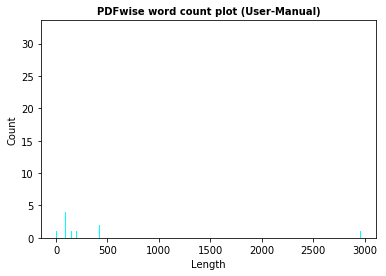

In [68]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'User-Manual' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='cyan')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (User-Manual)', fontweight ="bold",fontsize=10)
plt.show()

### 5.3) Additional-pdf_1

In [47]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt
pdf_path = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path = 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf1_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)

            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
    # closing the pdf file object
    pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
© 2015 APC by Schneider Electric. APC, the APC logo, and Smart-UPS are 
owned by Schneider Electric Industries S.A.S. or their affiliated companies. 
All other trademarks are property of their respective owners.EN 990-0178V
5/2015Always dispose of used batteries properly.
Use the packing from the new APC by Schneider Electric replacement battery 
cartridges (RBC) to ship the used battery packs.
Return used batteries to an appropriate facility for proper disposal and 
recycling. 
Refer to the APC by Schneider Electric web site 
http://www.apc.com/recycle,  for battery disposal facility locations.
Refer to the APC by Schneider Electric web site 
http://www.apc.com/contact/index.cfm,  for general APC by Schneider 
Electric information.Battery Disposal Information


************************************************     CLEANED TEXT       ********

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  121


************************************************     EXTRACTED TEXT       **********************************************************************
© 2015 APC by Schneider Electric. APC, the APC logo, and Smart-UPS are 
owned by Schneider Electric Industries S.A.S. or their affiliated companies. 
All other trademarks are property of their respective owners.EN 990-0178V
5/2015Always dispose of used batteries properly.
Use the packing from the new APC by Schneider Electric replacement battery 
cartridges (RBC) to ship the used battery packs.
Return used batteries to an appropriate facility for proper disposal and 
recycling. 
Refer to the APC by Schneider Electric web site 
http://www.apc.com/recycle,  for battery disposal facility locations.
Refer to the APC by Schneider Electric web site 
http://www.apc.com/contact/index.cfm,  for general APC by Schneider 
Electric information.Battery Disposal Information


************************************************     CLEANED 

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


©2021 NetAlly, LLC.   LL-FL-21-V4Models Supported by Link-Live  Description
Link-Live Cloud included with every  
NetAlly Handheld Tester!Device Management
Link-Live acts as a repository for latest firmware for NetAlly 
Testers that are under AllyCare to download/update.
•   Configure and push profiles to testing devices to ensure all 
test settings are uniform during network testing 
•   Claim units into different organizations to track device 
usage and manage role permissions
•   Remotely update software for all your units using Link-Live
Data Security
•   All authentication calls occur via 256-bit AES extended  
 validation SSL encryption
•   High-entropy password security using SHA-512 and HMAC  
 hashing algorithms
•  Third-party services are used to conduct periodic
 vulnerability scans of Link-Live CloudAllyCare Enabled Features
•   Essential functions are free to all users for results storage, 
management, and reporting
•   Additional features are only available to customers w

Xref table not zero-indexed. ID numbers for objects will be corrected.



WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. T

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEA

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


  LA-362
Rechargeable AA NiMH Batteries (2)
 
    
   
   
   
   
   
   
   
   
Product Overview:  Ideal for use with Listen discontinued legacy belt pack devices, the LA-362 Rechargeable AA NiMH
Batteries offer extended life and the ability to be recharged hundreds of times without capacity loss. They provide years of
dependable power and are compatible with drop-in charging cases from Listen Technologies. *NOTE: is not compatible with
iDSP receivers (LR-3200, LR-4200, LR-5200 receivers) 
Highlights:  
Reliable NiMH batteries that offer extended life and long-term savings
Ideal for use with Listen Technologies belt pack devices
Standard AA size batteries
Compatible with drop-in charging cases
Includes two (2) batteries in each package
 
Includes:
One (1) LA-362 Rechargeable AA NiMH Batteries (2) 
Product Specification: Rechargeable AA NiMH Batteries (2)
Power
Battery Capacity 2400 mA
Nominal Voltage 1.2 VDC
Classification NiMH (Nickel Metal Hydride)
Physical
Shipping Weight 1.0 lbs

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.


Customer support and warranty information is available at the A PC Web site, www.apc.com .
© 2019 APC by Schneider Electric. APC, the APC logo, Back-UPS, and Smart-UPS are owned by 
Schneider Electric Industries S.A.S ., or their affiliated companies. All other trademarks are prop erty 
of their respective owners.EN 990-3893D
8/2019Smart-UPS APCRBC132/APCRBC133/APCRBC133J





su0663asu0657a
su0631csu0661a su0661b
su0631bsu0657b
su0663b


************************************************     CLEANED TEXT       **********************************************************************
Customer support and warranty information is available at the A PC Web site www apc com 2019 APC by Schneider Electric APC the APC logo Back UPS and Smart UPS are owned by Schneider Electric Industries S A S or their affiliated companies All other trademarks are prop erty of their respective owners EN 990 3893D 8 2019Smart UPS APCRBC132 APCRBC133 APCRBC133J su0663asu0657a su0631csu0661a su0661b su0631

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


  LA-365
Replacement Rechargeable Li-ion Battery
 
    
   
   
   
   
   
   
   
   
Product Overview:  
Listen Technologies’ LA-365 Rechargeable Lithium-ion Battery offers a combination of extended charge life and quick
charging. Consistent, reliable, and long-lasting power make the battery a cost-effective choice while reducing the expense
and environmental costs associated with frequent alkaline replacement.
Note: This product can ONLY be shipped via Ground.
Highlights:  
Environmentally friendly and long lasting
Quick to recharge
Each battery is backed by a one (1) year warranty
Includes:
One (1) LA-365 Replacement Rechargeable Li-ion Battery 
Product Specification: Replacement Rechargeable Li-ion Battery
Power
Battery Type Lithium-ion NP60
Battery Capacity 1200 mAh
Battery Voltage 3.7 V
Battery Cycle Life 3,750 - 4,700 Discharge Cycles @ 10% Depth of Discharge (DoD) before
battery capacity drops to 70%, 2,000 - 2,500 @ 25% DOD, 1,200 - 1,500 @
50% DoD, 300 - 500 @ 100% DoD
Phys

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  379


************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstan

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the fai

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


 
LITHIUM ION BATTERY PACK  BMP21 -PLUS -BATT  SDS            Version 5 –  March 22, 2019  
PAGE 13 OF 13   
 
15. REGULATORY INFORMATION (Continued)  
EUROPEAN UNION REGULATIONS : 
CHEMICAL SAFETY ASSESSMENT :  No Data Available.  T he chemical safety assessment is required for some substances according 
to European Union Regulation (EC) 1907/2006, Article 14.  
Substances of Very High Concern (SVHC) Status :  Undetermined.   
EU RoHS Directive 2011/65/E U:  Internal circuitry of Li -ion BP is R oHS compliant.  
 
 
16. OTHER INFORMATION 
GLOBAL HARMONIZATION  UNDER  U.S. OSHA HAZARD COMMUNICATION STANDARD, CANADIAN WHMIS HPR -GHS 
2015 , EU CLP REGULATION (E C) 1272/2008 LABELIN G AND CLASSIFICATION , JAPANESE JIS Z 7 253: 2015:  LABELING 
AND CLASSIFICATION, KOREAN ISHA (Notice 2009 -68) LABELING AND CLASSI FICATION, NEW ZEALAND HAZARDOUS 
SUBSTANCES and NEW ORGANISMS ACT (HNSO) CHEMICAL CLASSIFICATION (COP 8 -1 09 -06), OR AUSTRALIAN 
NOHSC STANDARDS :  This product is an article a

Xref table not zero-indexed. ID numbers for objects will be corrected.


©2021 NetAlly, LLC.   LL-FL-21-V1 simplicity • visibility • collaborationModels Supported by Link-Live  
Model Number/Name Description
LSPRNTR-300 LinkSprinter® Pocket Network Tester  
LRAT-1000 LinkRunner AT 1000 Network AutoTester  
LRAT-2000 LinkRunner AT 2000 Network AutoTester  
LR-G2 LinkRunner G2 Smart Network Tester  
LR10G-100 LinkRunner 10G Advanced Ethernet Tester
AIRCHECK-G2 AirCheck G2 Wi-Fi Tester  
EXG-200 EtherScope nXG Portable Network Expert
1TG2-1500 OneTouch AT G2 1500  (discontinued)
1TG2-3000 OneTouch AT G2 3000  (discontinued)
1T10G-1000 OneTouch AT 10Gig  (discontinued)
System Requirements
General  
Browser Latest version of Chrome, Firefox, Safari, Edge, Internet Explorer. For best experience, use Chrome
netally.com/products/link-live 360
Link-Live included with every  
NetAlly Handheld Tester!Device Management
Link-Live acts as a repository for latest firmware for NetAlly 
Testers that are under AllyCare to download/update.
•   Configure and push profiles to t

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


PRODUCT 
SELECTION GUIDE
  Product / Feature LinkSprinterTest
AccessoryLinkRunner 
ATLinkRunner
G2LinkRunner
10GEtherScope
nXGAirCheck
G2AirMagnet
Survey PROAirMagnet
WiFi AnalyzerAirMagnet
Spectrum XT
Copper10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100 Mbps 
& 1/2.5/5/10 
Gbps  10/100 Mbps 
& 1/2.5/5/10 
Gbps   10/100/1000 
Mbps
Fiber 1 Gbps 1 Gbps 1/10 Gbps 1/10 Gbps
Wi-Fi Test  • • • • •
PoE Test Voltage only Voltage only Up to 30W Up to 90W Up to 90W Up to 90W Up to 30W
Default Gateway, DNS, IP 1 IP Target 1 IP Target 10 IP TargetUnlimited 
TargetsUnlimited 
TargetsUnlimited 
Targets1 IP Target
Line Rate Performance Test 10 Gbps 10 Gbps
Lanbert™ Media Qualification • •
Cable Open/Short/Length • • • • •
Wiremap & Toner • • • •
Network Discovery*  •* •
Packet Capture • • • • •
Remote View/ControlAndroid  
Apps  •* • •Windows 
AppsWindows 
AppsWindows 
Apps
Ethernet Support • •   
802.11 a/b/g/n/ac • •  • • •
802.11ax • Visibility Only • •
Wi-Fi Bands (2.4

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


CAUTION This Product is not for use with aquariums salt lamps or any other water related products To reduce the risk of fire or electric shock do not use with or near water water related products or any other liquid or source of moisture CAUTION This Product is not for use with any high current flow use including with appliances space heaters or laser printers WARNING Do not use for medical or life support equipment for fail safe operations or other high risk activities This Product is not designed or intended for use in high risk activities or hazardous environments requiring fail safe performance including the operation of nuclear facilities aircraft navigation or communication systems air traffic control weapons systems life support or medical applications or for use in any circumstance in which the failure of the Product could lead directly to death personal injury or severe physical or property damage or that would affect operation or safety of any medical or life support device c

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-121250 has a capacity of 125Ah, so the wire must be able to withstand 250A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seimic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-241000 has a capacity of 100Ah, so the wire must be able to withstand 200A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seimic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-121500 has a capacity of 150Ah, so the wire must be able to withstand 300A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seimic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the fai

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12750 has a capacity of 75Ah, so the wire must be able to withstand 150A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connectin

Xref table not zero-indexed. ID numbers for objects will be corrected.


CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the failure of the Product could 
lead directly to death, personal injury, or severe physical or property 
damage, or that would affect operation or safet

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
CAUTION!  This Product is not for use with aquariums, salt lamps, or 
any other water-related products. To reduce the risk of fire or electric 
shock, do not use with or near, water, water-related products, or any 
other liquid or source of moisture.
CAUTION!  This Product is not for use with any high current flow use 
including with appliances, space heaters, or laser printers. 
WARNING!  Do not use for medical or life support equipment, for 
fail safe operations, or other high-risk activities. This Product is not 
designed or intended for use in high-risk activities or hazardous 
environments requiring fail-safe performance, including the operation 
of nuclear facilities, aircraft navigation or communication systems, air 
traffic control, weapons systems, life support or medical applications 
or for use in any circumstance in which the fai

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTC-1290 has a capacity of 9Ah, so the wire must be able to withstand 18A.)
Charge all single batteries with 14.6V and series batteries with 58.4V.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-121000-G27 has a capacity of 100Ah, so the wire must be able to withstand 200A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-121000-G31 has a capacity of 100Ah, so the wire must be able to withstand 200A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEA

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BA

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  270


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LE

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com The charging efficiency (η) of a battery is expressed by the following formula:HOW TO CHARGE LEAD ACID BATTERIES 
BATTERY CHARGING EFFICIENCY 
The charging efficiency varies depending upon the state of charge of the battery, temperatures, and charging rates. Th

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-125OO
www. power-sonic.com © 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.E
Rev1:01/20TESTING CONDITIONS
Electrical Characteristics
Ambient Temperature: 20±5oC
Humidity: 45-85%
Testing Parameters
Tests should be conducted with batteries that have less than 5 cycles before the test. 
STANDARD CHARGE AND DISCHARGE
Standard Charge
Charge at 0.2C constant current until the battery reaches 14.6V. The battery then charges at constant voltage of 14.6V while tapering the charge current. Charging 
will end when the current has tapered to 0.02C. The battery should be charged between 0 ºC and 45 ºC, then rest for 30 minutes before discharging. Do not exceed 
the max charging current, voltage, or temperature limits as specified in this document. Do not reverse-polarity charge the battery. 
Standard Discharge
Battery should be discharged at a constant current of 0.2C to 10.0V at 20 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTC-12200 has a capacity of 20Ah, so the wire must be able to withstand 40A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seimic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.
Ma

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  291


************************************************     EXTRACTED TEXT       **********************************************************************
PARALLEL CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-12500 has a capacity of 50Ah, so the wire must be able to withstand 100A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PARALLEL CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTP-12750 has a capacity of 75Ah, so the wire must be able to withstand 150A.)
Charge all batteries with 14.6V per standard charge.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in parallel. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seismic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 batteries per circuit.

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12100 has a capacity of 10Ah, so the wire must be able to withstand 20A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seismic

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-BTC-1290 has a capacity of 9Ah, so the wire must be able to withstand 18A.)
Charge all single batteries with 14.6V and series batteries with 58.4V.
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seismic situations. Connecting impedance <0.1 mΩ
DO NOT connect more than 4 bat

Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-122600-G8D has a capacity of 260Ah, so the wire must be able to withstand 
520A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12500 has a capacity of 50Ah, so the wire must be able to withstand 100A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connectin

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-12350 has a capacity of 35Ah, so the wire must be able to withstand 70A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SC-1270 has a capacity of 7Ah, so the wire must be able to withstand 14A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecting in series. (Voltage difference <0.2V)
Install
Make sure the connections are tight and the connector is protected from corrosion, wear, and seismic s

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


SERIES
PARALLEL CONNECTION GUIDELINES
CAUTION:
The PSL-SH line cannot be used in parallel. For parallel connections, the PSL-BT or PSL-SC lines can be used.SERIES CONNECTION GUIDELINES
CAUTION:
Severe damage to the battery, short circuiting and sparking will happen if the batteries are not connected correctly or properly maintained. We recommend 
assembly be completed by fully trained professionals only.
Do not reverse connect the anode and cathode, as this will damage the batteries and/or any equipment connected.
DO NOT connect the batteries in parallel AND series at the same time.
Before install
Ensure wires can withstand twice the capacity rating of the battery. (Ex: PSL-SH-12100 has a capacity of 10Ah, so the wire must be able to withstand 20A.)
Charge all single batteries with 14.6V per standard charge and series batteries at a voltage of 14.6 times the number of batteries in series. 
Ensure all batteries have the same voltage level by fully charging each battery prior to connecti

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  327


************************************************     EXTRACTED TEXT       **********************************************************************
PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-1236 12V 8.5 AH @ 20-hr.
36 W/Cell @ 15-min.
Rechargeable Sea

Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in obj

990-3914
3/2011Installation Guide APCRBC134
12
34
56
78
9Customer support and warranty information is 
available at the APC Web site, www.apc.com .
© 2011 APC by Schneider Electric. APC, the 
APC logo, and Smart-UPS are owned by Schneider Electric Industries S.A.S., American 
Power Conversion Corporation, or their 
affiliated companies.  All other trademarks are property of their respective owners.oem01 64a
oem0163aoem0158a
oem0165aoem0160a
oem0161aoem0157a
oem0159aoem0162a


************************************************     CLEANED TEXT       **********************************************************************
990 3914 3 2011Installation Guide APCRBC134 12 34 56 78 9Customer support and warranty information is available at the APC Web site www apc com 2011 APC by Schneider Electric APC the APC logo and Smart UPS are owned by Schneider Electric Industries S A S American Power Conversion Corporation or their affiliated companies All other trademarks are property of their respective

Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in obj



************************************************     EXTRACTED TEXT       **********************************************************************
© 2015 APC by Schneider Electric. APC, the APC logo, and Smart-UPS are 
owned by Schneider Electric Industries S.A.S. or their affiliated companies. 
All other trademarks are property of their respective owners.EN 990-0178V
5/2015Always dispose of used batteries properly.
Use the packing from the new APC by Schneider Electric replacement battery 
cartridges (RBC) to ship the used battery packs.
Return used batteries to an appropriate facility for proper disposal and 
recycling. 
Refer to the APC by Schneider Electric web site 
http://www.apc.com/recycle,  for battery disposal facility locations.
Refer to the APC by Schneider Electric web site 
http://www.apc.com/contact/index.cfm,  for general APC by Schneider 
Electric information.Battery Disposal Information


************************************************     CLEANED TEXT       ********

Superfluous whitespace found in object header b'37' b'0'
Xref table not zero-indexed. ID numbers for objects will be corrected.


 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Xref table not zero-indexed. ID numbers for objects will be corrected.


© 2017 APC by Schneider Electric. APC, the APC logo are owned by Schneider Electric Industries 
S.A.S. or their affiliated companies. All other trad emarks are property of their respective owners.990-2902G
02/2017Hardwire safety
• Check national and local codes before wiring.
• Check that all branch circuit (mains) and low voltage (contro l) circuits are deenergized, and locked out before installing 
cables or making connections, whether in the junction box or to the UPS.
• Wiring by a qualified electrician is required.• Strain relief is required for all hardwiring (supplied with select products). 
Snap in type strain reliefs are recommended.
• All openings that allow access to UPS hardwire terminals must be covered. Failure to do so may result in personal injury 
or equipment damage.
• Select wire size and connectors according to nationa l and local codes.
Deenergizing safety
• The UPS contains internal batteries and may present a s hock hazard even when disconnected from AC and DC po

Xref table not zero-indexed. ID numbers for objects will be corrected.


2. Connect additional Extended Run Cabinets
Connect each additonal extended run cabinet to the previously installed 
cabinet. The Symmetra LX supports a maximum of seven cabinets.
2.1 Remove the screw and UPS battery connector panel  from the 
previously installed cabinet.
2.2 Connect the power cable  from the new cabinet into the battery 
connector  of the previous cabinet.
2.3 Set the dial  of the new cabine t to a number that is one higher 
than that of the previous cabinet .
2.4 Connect the communications cable  from the communications 
connector of the new cabinet  to that of the previous cabinet .3. Verify Connection
3.1 Check that the green st atus light on the rear of  each cabinet will light.
3.2 Check that the front display shows the correct dial number.3.3 Refer to the status menu on the UPS PowerView display (see the 
Symmetra LX Operations Guide ) to verify that the number of battery 
modules matches the total number of battery modules installed in the UPS and all extended

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
What’s in the box
•  Tower pedestal feet
•  Four-post rail kit 
•  Quick start guide 
•  Safety guide 
•  USB cable 
•  RS-232 cable
•   (2) IEC C13 to IEC C14 jumper 
cables (208V/230V “H” models)
To interact with the Eaton 5PX G2 UPS,  
please visit:  Eaton.com/5PXG2Additional options
Catalog number Description
103007018-5591 Two-post rack mounting rail kit (supports 2U models only)
RK4PRS Ship-in-rack 4-post rail kit (required to ship 5PX G2 while mounted in a rack on a shock pallet)
NETWORK-M2 Gigabit Network Card 
INDGW-M2 Industrial Gateway Card (Modbus + Relays + Network Management)
RELAY-MS Relay / Serial Interface Card 
 EMPDT1H1C2 Environmental Monitoring Probe (EMP) Gen 2 for use with NETWORK-M2 or INDGW-M2
EBMCBL48RT 5PX G2 2M EBM extension cable for 48V EBMs (use with 1–1.5 kVA models)
EBMCBL72 5PX G2 2M EBM extension cable for 

Xref table not zero-indexed. ID numbers for objects will be corrected.


What’s in the box
•  Tower pedestal feet
•  Four-post rail kit 
•  Quick start guide 
•  Safety guide 
•  USB cable 
•  RS-232 cable
•   (2) IEC C13 to IEC C14 jumper 
cables (208V/230V “H” models)
To interact with the Eaton 5PX G2 UPS,  
please visit: Eaton.com/5PXG2Additional options
Catalog number Description
103007018-5591 Two-post rack mounting rail kit (supports 2U models only)
RK4PRS Ship-in-rack 4-post rail kit (required to ship 5PX G2 while mounted in a rack on a shock pallet)
NETWORK-M2 Gigabit Network Card 
INDGW-M2 Industrial Gateway Card (Modbus + Relays + Network Management)
RELAY-MS Relay / Serial Interface Card 
 EMPDT1H1C2 Environmental Monitoring Probe (EMP) Gen 2 for use with NETWORK-M2 or INDGW-M2
EBMCBL48RT 5PX G2 2M EBM extension cable for 48V EBMs (use with 1–1.5 kVA models)
EBMCBL72 5PX G2 2M EBM extension cable for 72V EBMs (use with 2–3 kVA models)
Eaton
1000 Eaton Boulevard 
Cleveland, OH 44122 
United States
Eaton.com© 2022 Eaton
All Rights Reserved
Printed 

Xref table not zero-indexed. ID numbers for objects will be corrected.


 
Fluke . Keeping your world up and running.®
Fluke Corporation
PO Box 9090, Everett, WA 98206 U.S.A.
For more information call:
In the U.S.A. (800) 443-5853
In Canada (800) 36-FLUKE
From other countries +1 (425) 446-5500
www.fluke.com©2022 Fluke Corporation.
Specifications subject to change without notice.
04/2022
Modification of this document is not permitted
without written permission from Fluke Corporation.
3    Fluke Corporation     PLS RBP10
https://www.fluke.com/en-us/product/accessories/batteries/pls-rbp10


************************************************     CLEANED TEXT       **********************************************************************
Fluke Keeping your world up and running Fluke Corporation PO Box 9090 Everett WA 98206 U S A For more information call In the U S A 800 443 5853 In Canada 800 36 FLUKE From other countries 1 425 446 5500 www fluke com 2022 Fluke Corporation Specifications subject to change without notice 04 2022 Modification of this document is not p

OSError: [Errno 22] Invalid argument

[122, 122, 122, 122, 122, 167, 271, 287, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 67, 271, 271, 271, 228, 271, 271, 271, 67, 67, 387, 219, 126, 271, 380, 1579, 1579, 271, 271, 271, 818, 271, 271, 152, 271, 279, 184, 1579, 291, 291, 291, 291, 291, 291, 1579, 1579, 271, 160, 297, 298, 1579, 1579, 1579, 284, 299, 327, 271, 299, 299, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271,

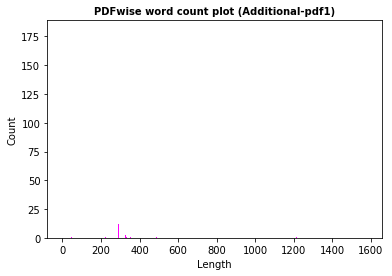

In [69]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf1_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='magenta')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf1)', fontweight ="bold",fontsize=10)
plt.show()

### 5.4) Additional-pdf_2

In [63]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt
pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf2_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)
            
            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
    # closing the pdf file object
    pdfFileObj.close()

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


/lozenge6 /lozenge6/lozenge4
/crosstar2/tristar2/lozenge6 /lozenge6/lozenge4
/crosstar2SURM2U Replacement Battery Cartridge installation Guide
This UPS has an easy to replace hot-swappable battery tray.  Battery replacement is a safeprocedure, isolated from electrical hazards.  You may leave the UPS and the protected equipmenton for the following proced ure.  See your dealer or www.apcc.com for more information.
Smart-UPS Model Replacement Battery Cartridge
SU700RM2U  RBC22
SU1000RM2U RBC23
SU1400RM2U RBC24
Please read before replacing the battery tray:
Once t he battery is disconn ected, the connected equipment is  not protected from power  outages.
Battery Replacement Procedure
1. The battery tray is accessible from the front of the UPS.2. Be careful removing the battery tray – it is heavy.3. This procedure requires a Phillips head screwdriver.4. Small sparks at the battery connectors are normal during re-connection.SU1400 RMJ2U                                       RBC24J
1. Face th

Xref table not zero-indexed. ID numbers for objects will be corrected.


/lozenge6 /lozenge6/lozenge4
/crosstar2/tristar2/lozenge6 /lozenge6/lozenge4
/crosstar2SURM2U Replacement Battery Cartridge installation Guide
This UPS has an easy to replace hot-swappable battery tray.  Battery replacement is a safeprocedure, isolated from electrical hazards.  You may leave the UPS and the protected equipmenton for the following proced ure.  See your dealer or www.apcc.com for more information.
Smart-UPS Model Replacement Battery Cartridge
SU700RM2U  RBC22
SU1000RM2U RBC23
SU1400RM2U RBC24
Please read before replacing the battery tray:
Once t he battery is disconn ected, the connected equipment is  not protected from power  outages.
Battery Replacement Procedure
1. The battery tray is accessible from the front of the UPS.2. Be careful removing the battery tray – it is heavy.3. This procedure requires a Phillips head screwdriver.4. Small sparks at the battery connectors are normal during re-connection.SU1400 RMJ2U                                       RBC24J
1. Face th

Xref table not zero-indexed. ID numbers for objects will be corrected.





************************************************     CLEANED TEXT       **********************************************************************

Word Count =  0


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


/lozenge6 /lozenge6/lozenge4
/crosstar2/tristar2/lozenge6 /lozenge6/lozenge4
/crosstar2SURM2U Replacement Battery Cartridge installation Guide
This UPS has an easy to replace hot-swappable battery tray.  Battery replacement is a safeprocedure, isolated from electrical hazards.  You may leave the UPS and the protected equipmenton for the following proced ure.  See your dealer or www.apcc.com for more information.
Smart-UPS Model Replacement Battery Cartridge
SU700RM2U  RBC22
SU1000RM2U RBC23
SU1400RM2U RBC24
Please read before replacing the battery tray:
Once t he battery is disconn ected, the connected equipment is  not protected from power  outages.
Battery Replacement Procedure
1. The battery tray is accessible from the front of the UPS.2. Be careful removing the battery tray – it is heavy.3. This procedure requires a Phillips head screwdriver.4. Small sparks at the battery connectors are normal during re-connection.SU1400 RMJ2U                                       RBC24J
1. Face th

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  167


************************************************     EXTRACTED TEXT       **********************************************************************
LHDOTTIE.COMFirst Aid Kit
First Aid Kit PC 6615
Dottie First Aid Kits are compliant with ANSI/ISEA Standards and are stocked with comprehensive 
components that meet or exceed your requirements. Items are packed in a convenient durable 
polypropylene case with molded handle and sliding latches, making it ideal for the workplace, jobsite, 
and work truck. 
CAT. 
NO.UPC DESCRIPTION STD MSTR WT/STD
FA25 4895 First Aid Kit-50 Per son-251 Pcs 1 4 1.50#
Features:
• ANSI/ISEA 2308.1-2009 Guidelines Class A  
Compliant Kit
• Serves up to 50 Person Team
• Features Multi-Compartment Case to keep 
Items Organized• Rubber gasket to protect Contents from 
Moisture and Dust 
• Easy-Slide Latch
• Includes New Silvex Antimicrobial Wound GelPROTECT
40 – Sheer Bandages - 3/4 in x 3 in
30 – Sheer Bandages - 3/8 in x 1-1/2 in
20 – Sheer Banda

Xref table not zero-indexed. ID numbers for objects will be corrected.


POWER -001 -  PS, PSH, PSG, PHR, PG, PDC and DCG Valve 
Regulated (VRLA) Batteries Absorbed Electrolyte (AGM)  
 Revision Date:  07-August -2020   
______________________________________________________________________ _______________________  
_____________________________________________________________________________________________  
Page  10 / 10  16. OTHER INFORMATION
NFPA  
 Health Hazards  
3   
 Flammability  
0   
 Instability  
2   
 Special Hazards  
-   
 
HMIS 
 Health Hazards  
Not determined   
 Flammability  
Not determined 
 Physical Hazards  
Not determined   
 Personal Protection  
Not determined   
 
Issue Date:  01-Jan-2014
Revision Date:  07-August -2020
Revision Note: 2020 update
Disclaimer  
The information provided in this Safety Data Sheet is correct t o the best of our knowledge, information and belief at the 
date of its publication. The information given is designed only as a guidance for safe handling, use, processing, storage, 
transportation, disposal 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
© 2018 APC by Schneider Electric. APC, the APC logo, PowerChute and Smart-UPS  
are owned by Schneider Electric Industries S.A.S. or their affiliated companies. All 
other trademarks are property of their respective owners.990-91196
7/2018WARNING:  The battery in this product can expose you to chemicals 
including lead and lead compounds, which is known to the State of California to cause cancer and birth defects or other reproductive harm. 
For more information go to www.P65Warnings.ca.gov
See Safety Data Sheet for more information. Safety Data sheets are available 
at: http://www.apc.com/us/en/who-we-are/sustainability/battery-safety/
battery-compliance.jsp
 A VERTISSEMENT:  La batterie de ce produit peut vous exposer à des 
agents chimiques, y compris lead and lead compounds, identifiés par l'État de Californie comme pouvant causer le can

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
POWER -001 -  PS, PSH, PSG, PHR, PG, PDC and DCG Valve 
Regulated (VRLA) Batteries Absorbed Electrolyte (AGM)  
 Revision Date:  07-August -2020   
______________________________________________________________________ _______________________  
_____________________________________________________________________________________________  
Page  10 / 10  16. OTHER INFORMATION
NFPA  
 Health Hazards  
3   
 Flammability  
0   
 Instability  
2   
 Special Hazards  
-   
 
HMIS 
 Health Hazards  
Not determined   
 Flammability  
Not determined 
 Physical Hazards  
Not determined   
 Personal Protection  
Not determined   
 
Issue Date:  01-Jan-2014
Revision Date:  07-August -2020
Revision Note: 2020 update
Disclaimer  
The information provided in this Safety Data Sheet is correct t o the best of our knowledge, information and belief at the 
da

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  167


************************************************     EXTRACTED TEXT       **********************************************************************
POWER -001 -  PS, PSH, PSG, PHR, PG, PDC and DCG Valve 
Regulated (VRLA) Batteries Absorbed Electrolyte (AGM)  
 Revision Date:  07-August -2020   
______________________________________________________________________ _______________________  
_____________________________________________________________________________________________  
Page  10 / 10  16. OTHER INFORMATION
NFPA  
 Health Hazards  
3   
 Flammability  
0   
 Instability  
2   
 Special Hazards  
-   
 
HMIS 
 Health Hazards  
Not determined   
 Flammability  
Not determined 
 Physical Hazards  
Not determined   
 Personal Protection  
Not determined   
 
Issue Date:  01-Jan-2014
Revision Date:  07-August -2020
Revision Note: 2020 update
Disclaimer  
The information provided in this Safety Data Sheet is correct t o the best of our knowledge, information an

Xref table not zero-indexed. ID numbers for objects will be corrected.


POWER -001 -  PS, PSH, PSG, PHR, PG, PDC and DCG Valve 
Regulated (VRLA) Batteries Absorbed Electrolyte (AGM)  
 Revision Date:  07-August -2020   
______________________________________________________________________ _______________________  
_____________________________________________________________________________________________  
Page  10 / 10  16. OTHER INFORMATION
NFPA  
 Health Hazards  
3   
 Flammability  
0   
 Instability  
2   
 Special Hazards  
-   
 
HMIS 
 Health Hazards  
Not determined   
 Flammability  
Not determined 
 Physical Hazards  
Not determined   
 Personal Protection  
Not determined   
 
Issue Date:  01-Jan-2014
Revision Date:  07-August -2020
Revision Note: 2020 update
Disclaimer  
The information provided in this Safety Data Sheet is correct t o the best of our knowledge, information and belief at the 
date of its publication. The information given is designed only as a guidance for safe handling, use, processing, storage, 
transportation, disposal 

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com THE COMPLETE GUIDE TO 
LITHIUM VS LEAD ACID BATTERIES SERIES & PARALLEL BATTERY INSTALLATION 
A quick and important note: When installing batteries in series and parallel, it is important that they are matched across all 
factors including capacity, voltag

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com THE COMPLETE GUIDE TO 
LITHIUM VS LEAD ACID BATTERIES SERIES & PARALLEL BATTERY INSTALLATION 
A quick and important note: When installing batteries in series and parallel, it is important that they are matched across all 
factors including capacity, voltag

Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PHR SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com Data Center UPS
Rev1: 12/18
SPECIFICATIONS

Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in object header b'36' b'0'
Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in obj

 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in obj

 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Superfluous whitespace found in object header b'36' b'0'
Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in obj

 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in obj

 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Superfluous whitespace found in object header b'37' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in obj

 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Superfluous whitespace found in object header b'36' b'0'
Superfluous whitespace found in object header b'37' b'0'


 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in obj

© 2015 APC by Schneider Electric. APC, the APC logo, and Smart-UPS are 
owned by Schneider Electric Industries S.A.S. or their affiliated companies. 
All other trademarks are property of their respective owners.EN 990-0178V
5/2015Always dispose of used batteries properly.
Use the packing from the new APC by Schneider Electric replacement battery 
cartridges (RBC) to ship the used battery packs.
Return used batteries to an appropriate facility for proper disposal and 
recycling. 
Refer to the APC by Schneider Electric web site 
http://www.apc.com/recycle,  for battery disposal facility locations.
Refer to the APC by Schneider Electric web site 
http://www.apc.com/contact/index.cfm,  for general APC by Schneider 
Electric information.Battery Disposal Information


************************************************     CLEANED TEXT       **********************************************************************
 2015 APC by Schneider Electric APC the APC logo and Smart UPS are owned by Schneide

Xref table not zero-indexed. ID numbers for objects will be corrected.
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'39' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'


Word Count =  365


************************************************     EXTRACTED TEXT       **********************************************************************
© 2019 APC by Schneider Electric. APC, the APC logo are owned by Schneider Electric Industries 
S.A.S. or their affiliated companies. All other trademarks are property of their respective owners.EN 990-9284B-001
5/2019Deenergizing safety
• The UPS may present a shock hazard even when disconnected from AC and DC power.
• The AC and DC connectors may be energized by remote or automatic control at any time. • Before installing or servicing the equipment check that the:
• Input circuit breaker is in the OFF  position or the equipment is disconnected from the AC source.
• External battery packs are disconnected.
Battery safety
• The battery typically lasts for five to ten years. Environmental factors impact battery life. Elevated ambient 
temperatures, poor quality utility power, and frequent short duration discharges will short

Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'35' b'0'
Superfluous whitespace found in object header b'34' b'0'
Superfluous whitespace found in object header b'33' b'0'
Superfluous whitespace found in object header b'38' b'0'
Superfluous whitespace found in object header b'36' b'0'
Superfluous whitespace found in object header b'37' b'0'
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


 
  
 
Battery Regulatory information and obligations  
 
Batteries that can contain substances that are hazardous to the environment and health, especially lithium batteries 
should be handled with special care. The separation, collection, and recycling of used batteries helps to reduce the 
negative impact of batteries on the environment and the world's decrease in human health. 
Please try to avoid the generation of battery waste as much as possible by Using rechargeable batteries and ensure 
that batteries or battery-containing devices are always properly stored in compliance with the legal obligations to 
avoid Waste pollution to be disposed of. As a user of batteries, please also consider Ways to prepare batteries for 
reuse whenever possible. 
Batteries must not be disposed of along with household or business waste. You are legally obliged to return the used 
batteries so that they can be properly recycled.  You can get used non-rechargeable and rechargeable batteries to 
munici

Xref table not zero-indexed. ID numbers for objects will be corrected.


PRATICIDADE NA INSTALAÇÃO PRATICIDADE NA INSTALAÇÃO PRATICIDADE NA INSTALAÇÃO PRATICIDADE NA INSTALAÇÃO 
DO SEU SMART-UPS BR 2200VADO SEU SMART-UPS BR 2200VA
O novo APC Basic Rack PDUAPC Basic Rack PDU  traz a mesma 
confiabilidade APC em uma PDU flexível, que pode confiabilidade APC em uma PDU flexível, que pode 
ser reaproveitada em diversos tipos de nobreak: ser reaproveitada em diversos tipos de nobreak: 
basta trocar o PowerCord (vendido separadamente).basta trocar o PowerCord (vendido separadamente).
Software de gerenciamento 
PowerChute Business Edition
Poderoso e intuitivo, acrescenta ainda mais inteligência às 
proteções oferecidas pelo Smart-UPS BR 2200VA.
        Melhor monitoramento da rede elétrica
        Maior confiabilidade no gerenciamento do equipamento
        Compatibilidade com o sistema de gerenciamento 
        da empresa
        Desligamento inteligente do sistema operacional 
        em caso de falta de energia prolongada
DADOS TÉCNICOS
20  x
basta trocar o Pow

Xref table not zero-indexed. ID numbers for objects will be corrected.


EBM 48V RT 2U
EBM 72V RT 2U
EBM 72V RT 3U
Quick Start5PXwww.eaton.com
614-40054-00
5
 6
 5
 6
56
+ 40 °C
0 °C
20%90%
eaton.com/5PX



************************************************     CLEANED TEXT       **********************************************************************
EBM 48V RT 2U EBM 72V RT 2U EBM 72V RT 3U Quick Start5PXwww eaton com 614 40054 00 5 6 5 6 56 40 C 0 C 20 90 eaton com 5PX
Word Count =  33


************************************************     EXTRACTED TEXT       **********************************************************************
Restore life to UPS systems that have 
weak or depleted internal batteries
The RB1270X2D UPS Replacement Battery Cartridge 
restores life to CyberPower UPS systems that have weak 
or completely depleted internal batteries. The RB1270X2D 
contains two 12V/7Ah batteries, certified to meet or exceed 
original manufacturer specifications. This leak-proof, sealed lead-
acid battery never requires replacement fluid. The pre-assembled 
car

[485, 47, 485, 1, 485, 167, 271, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 83, 167, 167, 167, 167, 167, 167, 167, 167, 294, 167, 167, 167, 167, 167, 167, 303, 303, 118, 167, 478, 167, 167, 167, 167, 292, 167, 224, 38, 380, 380, 380, 380, 380, 380, 167, 380, 380, 380, 380, 380, 167, 380, 380, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,

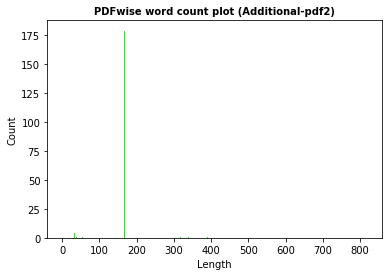

In [70]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf2_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='lime')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf2)', fontweight ="bold",fontsize=10)
plt.show()

### 5.5) Additional-pdf_3

In [33]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf3_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)

            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
    # closing the pdf file object
    pdfFileObj.close()

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


PRODUCT 
SELECTION GUIDE
  Product / Feature LinkSprinterTest
AccessoryLinkRunner 
ATLinkRunner
G2LinkRunner
10GEtherScope
nXGAirCheck
G2AirMagnet
Survey PROAirMagnet
WiFi AnalyzerAirMagnet
Spectrum XT
Copper10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100 Mbps 
& 1/2.5/5/10 
Gbps  10/100 Mbps 
& 1/2.5/5/10 
Gbps   10/100/1000 
Mbps
Fiber 1 Gbps 1 Gbps 1/10 Gbps 1/10 Gbps
Wi-Fi Test  • • • • •
PoE Test Voltage only Voltage only Up to 30W Up to 90W Up to 90W Up to 90W Up to 30W
Default Gateway, DNS, IP 1 IP Target 1 IP Target 10 IP TargetUnlimited 
TargetsUnlimited 
TargetsUnlimited 
Targets1 IP Target
Line Rate Performance Test 10 Gbps 10 Gbps
Lanbert™ Media Qualification • •
Cable Open/Short/Length • • • • •
Wiremap & Toner • • • •
Network Discovery*  •* •
Packet Capture • • • • •
Remote View/ControlAndroid  
Apps  •* • •Windows 
AppsWindows 
AppsWindows 
Apps
Ethernet Support • •   
802.11 a/b/g/n/ac • •  • • •
802.11ax • Visibility Only • •
Wi-Fi Bands (2.4

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6 05 18 16 5 Training Advice Only trained competent personnel who have received special instructions for the hazards and risks should be allowed to handle VRLA Batteries See Section 7 1 for general advice 16 6 Further Information To ensure the safe use of VRLA Industrial Batteries supplied by Power Sonic the following precautions must be observed Never short circuit battery terminals since sparks and arcs produced can injure personnel and are a fire and explosion hazard Batteries must always be charged on a voltage regulated charging system with adequate ventilation provided to avoid the build up of ignitable gases and to promote good heat dissipation Do not charge VLRA Batteries above 50 C discharge or store above 60 C Under extreme conditions of charging equipment malfunction and or battery failure high voltage and high temperature conditions may occur causing the evolution of Hydrogen Sulphide H2S gas which is toxic If detected by its odour of rotten eggs at extremely low

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
Printed 5/00 - 3,000
Rev.- 5/00 Printed in USAEastern Regional Office: (201) 964-0118 (800) 962-1287
Western Regional Office: (562) 949-4266 (800) 423-4667Corporate Office:P.O.Box 14145, Reading, PA 19612-4145
fax:(610) 372-8613
Visit us on the web at: www.yuasastationary.com
Please check our website for literature updates


************************************************     CLEANED TEXT       **********************************************************************
Printed 5 00 3 000 Rev 5 00 Printed in USAEastern Regional Office 201 964 0118 800 962 1287 Western Regional Office 562 949 4266 800 423 4667Corporate Office P O Box 14145 Reading PA 19612 4145 fax 610 372 8613 Visit us on the web at www yuasastationary com Please check our website for literature updates
Word Count =  57


************************************************     EXTRA

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
LITHIUM BATTERY MANAGEMNT SYSTEM

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


PRODUCT 
SELECTION GUIDE
  Product / Feature LinkSprinterTest
AccessoryLinkRunner 
ATLinkRunner
G2LinkRunner
10GEtherScope
nXGAirCheck
G2AirMagnet
Survey PROAirMagnet
WiFi AnalyzerAirMagnet
Spectrum XT
Copper10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100/1000 
Mbps10/100 Mbps 
& 1/2.5/5/10 
Gbps  10/100 Mbps 
& 1/2.5/5/10 
Gbps   10/100/1000 
Mbps
Fiber 1 Gbps 1 Gbps 1/10 Gbps 1/10 Gbps
Wi-Fi Test  • • • • •
PoE Test Voltage only Voltage only Up to 30W Up to 90W Up to 90W Up to 90W Up to 30W
Default Gateway, DNS, IP 1 IP Target 1 IP Target 10 IP TargetUnlimited 
TargetsUnlimited 
TargetsUnlimited 
Targets1 IP Target
Line Rate Performance Test 10 Gbps 10 Gbps
Lanbert™ Media Qualification • •
Cable Open/Short/Length • • • • •
Wiremap & Toner • • • •
Network Discovery*  •* •
Packet Capture • • • • •
Remote View/ControlAndroid  
Apps  •* • •Windows 
AppsWindows 
AppsWindows 
Apps
Ethernet Support • •   
802.11 a/b/g/n/ac • •  • • •
802.11ax • Visibility Only • •
Wi-Fi Bands (2.4

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
Long term storage
If you need t

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
Long term storage
If you need to keep your batteries in storage for an extended period, there are a few things to consider as the storage 
requirements are different for SLA and lithium batteries. 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
Long term storage
If you need to keep your batteries in storage for an extended period, there are a few things to consider as the storage 
requirements are different for SLA and lithium batteries. 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
Long term storage
If you need to keep your batteries in storage for an extended period, there are a few things to consider as the storage 
requirements are different for SLA and lithium batteries. 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  477


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  477


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
Long term storage
If you need t

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	fai

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6 05 18 16 5 Training Advice Only trained competent personnel who have received special instructions for the hazards and risks should be allowed to handle VRLA Batteries See Section 7 1 for general advice 16 6 Further Information To ensure the safe use of VRLA Industrial Batteries supplied by Power Sonic the following precautions must be observed Never short circuit battery terminals since sparks and arcs produced can injure personnel and are a fire and explosion hazard Batteries must always be charged on a voltage regulated charging system with adequate ventilation provided to avoid the build up of ignitable gases and to promote good heat dissipation Do not charge VLRA Batteries above 50 C discharge or store above 60 C Under extreme conditions of charging equipment malfunction and or battery failure high voltage and high temperature conditions may occur causing the evolution of Hydrogen Sulphide H2S gas which is toxic If detected by its odour of rotten eggs at extremely low

Xref table not zero-indexed. ID numbers for objects will be corrected.


MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction	and/or	battery	failure,	high	voltage	and	high	temperature	conditions	may	occur	causing	the	evolution	of	Hydrogen	Sulphide	(H2S)	gas,	which	is	toxic.	If	detected	by	i

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  187


************************************************     EXTRACTED TEXT       **********************************************************************
MSC013 Rev 6  05/18 		
	16.5 Training Advice • Only trained, competent personnel, who have received special instructions for the hazards and risks, should be allowed to handle VRLA Batteries. • See Section 7.1 for general advice 16.6	Further	Information	To	ensure	the	safe	use	of	VRLA	Industrial	Batteries	supplied	by	Power-	Sonic,	the	following	precautions	must	be	observed:	•	Never	short-circuit	battery	terminals,	since	sparks	and	arcs	produced	can	injure	personnel	and	are	a	fire	and	explosion	hazard.	•	Batteries	must	always	be	charged	on	a	voltage-regulated	charging	system	with	adequate	ventilation	provided	to	avoid	the	build-up	of	ignitable	gases	and	to	promote	good	heat	dissipation.	•	Do	not	charge	VLRA	Batteries	above	+	50	ºC,	discharge	or	store	above	+	60	ºC.	•	Under	extreme	conditions	of	charging	equipment	malfunction

OSError: [Errno 22] Invalid argument

[188, 279, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 57, 188, 699, 188, 188, 188, 188, 279, 188, 478, 478, 478, 478, 478, 478, 188, 478, 478, 478, 478, 478, 188, 478, 478, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 699, 478, 699, 478, 478, 478, 478, 478, 478, 478, 478, 478, 478, 478, 478, 478, 271, 174]


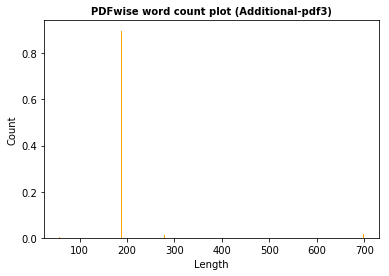

In [71]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf3_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='orange', density=True)
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf3)', fontweight ="bold",fontsize=10)
plt.show()

### 5.6) Additional-pdf_4

In [35]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf4_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)

            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
    # closing the pdf file object
    pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com PS SERIES 
Rechargeable Sealed Lead Acid Batteries
(continued)Fire & 
SecurityG

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com PS SERIES 
Rechargeable Sealed Lead Acid Batteries
(continued)Fire & 
SecurityG

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSH SERIESPHYSICAL DIMENSIONS: inch (mm) Tolerances are +/- 0.04 in. (+/- 1mm) and +/- 0.08 in. (+/- 2mm) for height dimensions. All data subject to change without notice.
TERMINALS: (mm)
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSH SERIESPHYSICAL DIMENSIONS: inch (mm) Tolerances are +/- 0.04 in. (+/- 1mm) and +/- 0.08 in. (+/- 2mm) for height dimensions. All data subject to change without notice.
TERMINALS: (mm)
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com PS SERIES 
Rechargeable Sealed Lead Acid Batteries
(continued)Fire & 
SecurityG

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com PS SERIES 
Rechargeable Sealed Lead Acid Batteries
(continued)Fire & 
SecurityG

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION Please refer to our website www power sonic com for a complete range of useful downloads such as product catalogs material safety data sheets MSDS ISO certification etc PS SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O EPOWER SONIC EMEA EMEA EUROPE MIDDLE EAST AND AFRICA Smitspol 4 3861 RS Nijkerk The NetherlandsT NL 31 33 7410 700 T UK 44 1268 560 686 T FR 33 344 32 18 17 E salesEMEA power sonic com GLOBAL HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 365 Cabela Dr Suite 300 Reno Nevada 89523 USAT 1 619 661 2020 E customer service power sonic com PS SERIES Rechargeable Sealed Lead Acid Batteries continued Fire SecurityGeneral PurposeEmergency LightingMedical Rev1 12 18 SPECIFICATION

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com PS SERIES 
Rechargeable Sealed Lead Acid Batteries
(continued)Fire & 
SecurityG

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
FURTHER INFORMATION
Please refer to our website www.power-sonic.com  for a complete  
range of useful downloads, such as product catalogs,  
material safety data sheets (MSDS),  
ISO certification, etc.
PSL SERIESPHYSICAL DIMENSIONS: inch (mm) Tolerances are +/- 0.04 in. (+/- 1mm) and +/- 0.08 in. (+/- 2mm) for height dimensions. All data subject to change without notice.
TERMINALS: (mm)
SPECIFICATIONS
ModelBattery 
Type*Nominal  
VoltageRated Capacity Dimensions: inch (mm)
WeightTerminal 
Type 
StandardLength Width Height Total Height
V AH inch mm inch mm inch mm inch mm lbs. kgs.
PSL-12450E E3 12.8 45.0 7.70 195 5.20 130 7.20 183 7.20 183 12.8 5.8 M6
PSL-12500 E3 12.8 51.4 7.70 195 5.20 130 7.20 183 7.20 183 12.8 5.8 M6
PSL-24100 E2 25.6 10.0 7.13 195 3.03 77 6.57 167 6.57 167 6.1 2.75 M6
PSL-24200 E2 25.6 22.0 7.70 181 5.20 130 7.20 183 7

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com PS SERIES 
Rechargeable Sealed Lead Acid Batteries
(continued)Fire & 
SecurityG

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PS HD SERIESPHYSICAL DIMENSIONS: inch (mm) Tolerances are +/- 0.04 in. (+/- 1mm) and +/- 0.08 in. (+/- 2mm) for height dimensions. All data subject to change without notice.
TERMINALS: (mm)
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  698


************************************************     EXTRACTED TEXT       **********************************************************************
FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  698


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com HOW TO CHARGE LITHIUM IRON PHOSPHATE 
(LIFEPO4) BATTERIES 
LITHIUM BATTERY MANAGEMNT SYSTEM

Xref table not zero-indexed. ID numbers for objects will be corrected.


WHITE PAPER www power sonic com Rev1 03 20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2020 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O EGLOBAL HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 365 Cabela Dr Suite 300 Reno Nevada 89523 USAT 1 619 661 2020 E custom er service power sonic com POWER SONIC EMEA EMEA EUROPE MIDDLE EAST AND AFRICA Smitspol 4 3861 RS Nijkerk The Netherlands T NL 31 33 7410 700 T UK 44 1268 560 686 T FR 33 344 32 18 17 E salesEMEA power sonic com HOW TO CHARGE LITHIUM IRON PHOSPHATE LIFEPO4 BATTERIES LITHIUM BATTERY MANAGEMNT SYSTEM The most sophisticated level of control for a lithium battery is the Battery Management System It maintains the same functions as the balance circuit and contains the same protections as the PCM Where it differs is in its adv

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com FEATURES
 •Deep cycle gel battery
 •Thixot

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com FEATURES
 •Deep cycle gel battery
 •Thixot

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com FEATURES
 •Deep cycle gel battery
 •Thixot

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Wind Solar Mobility Medical Golf Carts
Rev2: 06/19
SPECIFICATIONS
Mod

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Wind Solar Mobility Medical Golf Carts
Rev2: 06/19
SPECIFICATIONS
Mod

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Wind Solar Mobility Medical Golf Carts
Rev2: 06/19
SPECIFICATIONS
Mod

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Wind Solar Mobility Medical Golf Carts
Rev2: 06/19
SPECIFICATIONS
Mod

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com 
Fire & 
SecurityTelecomms Emergency 
Light

[857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 1187, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 857, 1187, 1187, 1187, 857, 1187, 857, 857, 644, 857, 668, 857, 857, 857, 668, 2805, 857, 857, 857, 1711, 1711, 699, 699, 699, 699, 699, 699, 668, 699, 699, 699, 699, 699, 668, 699, 699, 644, 644, 644, 668, 668, 668, 668, 667, 667, 857, 857, 857, 857, 857, 857, 857, 857, 857, 699, 699, 699, 699, 699]


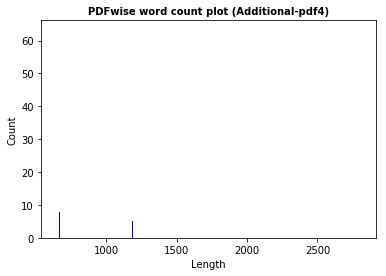

In [72]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf4_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='blue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf4)', fontweight ="bold",fontsize=10)
plt.show()

### 5.7) Additional-pdf_5

In [37]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf5_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)
            
            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
    # closing the pdf file object
    pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
Battery pack containing sealed lead acid batteries   Page 14 to 14 
Version: 1 
Date: October, 13th, 2015  SECTION  16: Other  information  
 
Review date: October , 13th, 2015  
Version : 1 
 
Relevant Phrases (code & full text)  
H319 - Causes serious eye irritation  
H332 - Harmful if inhaled  
H335 - May cause respiratory irritation  
H361 - Suspected of damaging fertility or the unborn child.  
H372 - Causes damage to organs through prolonged or repeated exposure.  
R36/37 - Irritating to eyes and respiratory system.  
R38 - Irritating to skin.  
R48/20 - Harmful: danger of serious damage to health  by prolonged exposure through  inhalation.  
R63 - Possible risk of harm to the unborn child.  
 
Every endeavor has been made to ensure that the information contained in this publication is reliable and offered in 
good faith. It is meant t

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 
100%

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  675


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  545


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O ECORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com POWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com SHELF LIFE STORAGE LIFE CHARACTERISTICS IN STAND BY USECapacity Retention Ratio Standing Period Months 100 80 60 40 0 2 4 6 8 10 12 14 16 18 2040oC 104oF 30oC 86oF 20oC 68oF 5oC 41oF Charging is not necessary unless 100 of capacity is required Charging before use is necessary to help recover full capaci

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  555


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  548


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O ECORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com POWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com SHELF LIFE STORAGE LIFE CHARACTERISTICS IN STAND BY USECapacity Retention Ratio Standing Period Months 100 80 60 40 0 2 4 6 8 10 12 14 16 18 2040oC 104oF 30oC 86oF 20oC 68oF 5oC 41oF Charging is not necessary unless 100 of capacity is required Charging before use is necessary to help recover full capaci

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  545


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  551


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  559


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  555


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  555


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSH HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PSH-12100FR 12V 10.5 AH @ 20-hr.
41 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PSH – High-Rate Series
CONSTANT POWER DISCHARGE (WATTS/CELL) AT 25°C (77°F)
ModelFinal 
VoltageWatts per Cell @ 25°C (68°F) 
5min 10min 15mi

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSH HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PSH-1255FR 12V 6.0 AH @ 20-hr.
24 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PSH – High-Rate Series
CONSTANT POWER DISCHARGE (WATTS/CELL) AT 25°C (77°F)
ModelFinal 
VoltageWatts per Cell @ 25°C (68°F) 
5min 10min 15min 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  694


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSH HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PSH-12180FR 12V 21.0 AH @ 20-hr.
80 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid B

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  545


************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com 
PDC-12350 12V 35.0 AH @ 20-hr.
12V 33.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cy

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)
Smitspol 4, 3861 RS Nijkerk,
The NetherlandsT NL:
 + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA)
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.


************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com 
PDC-12400 12V 40.0 AH @ 20-hr.
12V 38.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cycle AGM Series
SHELF 

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PSL-24200 25.6V 22.0 AH
Rechargeable Lithium Iron Phosphate Battery
PSL – LiFePO4 Series
100%
80%
60%
40%
20%
0%Voltage (V)

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  559


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS HD SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com CORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com PS-12200HD-M6 12V 21.0 AH @ 20-hr.
12V 20.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-BTP  
SERIESBMS TECHNICAL SPECIFICATIONS
Over-charge
Over-charge protection voltage for each cell 3.8 V
Over-charge release voltage for each cell 3.6 V
Over-charge release methodProtection releases when all cell 
voltages drop below the over-charge 
release voltage
Over-discharge
Over-discharge protection voltage for each cell 2.4 V
Over-discharge release voltage for each cell 2.8 V
Over-discharge release method Protection releases upon charging
Over current
Discharge over current protection 105-125 A
Over-current delay time 15-25 S
Over current release conditionProtection releases upon removing load 
and charging
Battery temperature
Over-temperature protection 65±5°C
Release temperature 50±5°C
Short circuit protection
Function condition External short circuit
Short circuit delay time 200 ms
Release conditionProtection releases upon removing short 
circuit and chargingVoltage (V)
Capacity (% rated)2021.22223.22425.22627.228
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  471


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  471


************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PDC-121000 12V 100.0 AH @ 20-hr.
12V 92.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep C

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifeBMS TECHNICAL SPECIFICATIONS
Over Charge
Over-charge protection for each cell 3.90 V
Over-c

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  480


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  482


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-SH  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PDC-12200 12V 21.0 AH @ 20-hr.
12V 20.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cycle AGM Series
SHELF

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifeBMS TECHNICAL SPECIFICATIONS
Over Charge
Over-charge protection for each cell 3.90 V
Over-c

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  482


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-100 12V 100.0 AH @ 20-hr.
12V 93.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
DCG – Deep Cycle Gel Series
CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGE GENERAL RELATION OF CAPACITY VS. STORAGE TIME
30406080
20
10507090100
Number of

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  539


************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-125 12V 125.0 AH @ 20-hr.
12V 121.0 AH @ 10-hr.
Rechargeable Sealed Lead

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  538


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-140 12V 140.0 AH @ 20-hr.
12V 126.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
DCG – Deep Cycle Gel Series
CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGE GENERAL RELATION OF CAPACITY VS. STORAGE TIME
30406080
20
10507090100
Number o

Xref table not zero-indexed. ID numbers for objects will be corrected.


DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-17 12V 17.0 AH @ 20-hr.
12V 15.8 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
DCG – Deep Cycle Gel Series
CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGE GENERAL RELATION OF CAPACITY VS. STORAGE TIME
30406080
20
10507090100
Number of C

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  538


************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com 
DCG12-26 12V 26.0 AH @ 20-hr.
12V 24.2 AH @ 10-hr.
Rechargeable Sealed Lead 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  538


************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-38 12V 38.0 AH @ 20-hr.
12V 35.3 AH @ 10-hr.
Rechargeable Sealed Lead A

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com DCG12-45 12V 45 AH @ 20-hr.
12V 40 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
DCG – Deep Cycle Gel Series
CYCLE LIFE

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  540


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-50 12V 50.0 AH @ 20-hr.
12V 46.5 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
DCG – Deep Cycle Gel Series
CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGE GENERAL RELATION OF CAPACITY VS. STORAGE TIME
30406080
20
10507090100
Number of C

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  538


************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-65 12V 65.0 AH @ 20-hr.
12V 60.5 AH @ 10-hr.
Rechargeable Sealed Lead A

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  538


************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-70 12V 70.0 AH @ 20-hr.
12V 65.1 AH @ 10-hr.
Rechargeable Sealed Lead Ac

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
DCG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com DCG12-85 12V 85.0 AH @ 20-hr.
12V 78.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
DCG – D

Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  486


************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PDC-121100 12V 107.2 AH @ 20-hr.
12V 100.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep C

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com PDC-121300 12V 128.6 AH @ 20-hr.
12V 120.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cycle AGM Series
SHELF LIFE & STORAGE CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0    2    4    6    

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020.  Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PDC-122000 12V 214.0 AH @ 20-hr.
12V 200.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cycle AGM Series
SHELF LIFE & STORAGE CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PDC-12260 12V 27.8 AH @ 20-hr.
12V 26.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cycle AGM Series
SHELF

Xref table not zero-indexed. ID numbers for objects will be corrected.


PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PDC-12600 12V 60.0 AH @ 20-hr.
12V 65.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cycle AGM Series
SHELF LIFE & STORAGE CYCLE LIFE IN RELATION TO DEPTH OF DISCHARGECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4    

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  485


************************************************     EXTRACTED TEXT       **********************************************************************
PDC SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com 
PDC-12800 12V 80.0 AH @ 20-hr.
12V 75.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PDC – Deep Cy

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619 ) 661 2020 
F: +1 (619 ) 661 3650 
E: custom er-service@power-sonic.com POWER-SONIC EUROPE LIMITED 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ T:
 +44 (0) 1268 560686 
F: +44 (0) 1268 560902 
E: salesEM EA@power-sonic.com PG-12V21 12V 18.9 AH @20-hr.
12V 18.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PS – Gen

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PG-12V21 FR 12V 18.9 AH @20-hr.
12V 18.0 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PS – General Purpose Series
CHARGING
Cycle Applications:  Apply constant voltage charge at 
2.35v/c – 2.45v/c (14.1 – 14.7v for 12v Monobloc) at 20°C. 
Initial charging current sho

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PG SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com PG-12V9 FR 12V 8.46AH @ 20-hr.
12V 7.93 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
PS – General Purpose Series
CHARGI

Xref table not zero-indexed. ID numbers for objects will be corrected.


PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-12100 12V 27.0 AH @ 20-hr.
93 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PHR – High-Rate Series
CHARGING
Cycle Applications:  Apply constant voltage charge at 
2.35v/c - 2.45v/c (14.1 – 14.7v for 12v Monobloc) at 20

Xref table not zero-indexed. ID numbers for objects will be corrected.


PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-12150 12V 36.0 AH @ 20-hr.
150 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PHR – High-Rate Series
CHARGING
Cycle Applications:  Apply constant voltage charge at 
2.35v/c - 2.45v/c (14.1 – 14.7v for 12v Monobloc) at 2

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  818


************************************************     EXTRACTED TEXT       **********************************************************************
PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-12300 12V 82.0 AH @ 20-hr.
324 W/Cell @ 15-min.
Rechargeable 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  827


************************************************     EXTRACTED TEXT       **********************************************************************
PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-12350 12V 95.0 AH @ 20-hr.
370 W/Cell @ 15-min.
Rechargeable 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  827


************************************************     EXTRACTED TEXT       **********************************************************************
PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-1236 12V 8.5 AH @ 20-hr.
36 W/Cell @ 15-min.
Rechargeable Sea

Xref table not zero-indexed. ID numbers for objects will be corrected.


PHR HIGH RATE SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O ECORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com POWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com PHR 1236 12V 8 5 AH 20 hr 36 W Cell 15 min Rechargeable Sealed Lead Acid Battery PHR High Rate Series CHARGING Cycle Applications Apply constant voltage charge at 2 35v c 2 45v c 14 1 14 7v for 12v Monobloc at 20 C Initial charging current should be set at less than 0 25C Amps Switch to float

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     CLEANED TEXT       **********************************************************************
PHR HIGH RATE SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O ECORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com POWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com PHR 12400 12V 110 0 AH 20 hr 430 W Cell 15 min Rechargeable Sealed Lead Acid Battery PHR High Rate Series CHARGING Cycle Applications Apply constant

Xref table not zero-indexed. ID numbers for objects will be corrected.


PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-12500 12V 150.0 AH @ 20-hr.
492 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PHR – High-Rate Series
CHARGING
Cycle Applications:  Apply constant voltage charge at 
2.35v/c - 2.45v/c (14.1 – 14.7v for 12v Monobloc) at 

Xref table not zero-indexed. ID numbers for objects will be corrected.


PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-12550 12V 155.0 AH @ 20-hr.
539 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PHR – High-Rate Series
CHARGING
Cycle Applications:  Apply constant voltage charge at 
2.35v/c - 2.45v/c (14.1 – 14.7v for 12v Monobloc) at 

Xref table not zero-indexed. ID numbers for objects will be corrected.


PHR HIGH  
RATE SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PHR-1290 12V 21.2 AH @ 20-hr.
90 W/Cell @ 15-min.
Rechargeable Sealed Lead Acid Battery
PHR – High-Rate Series
CHARGING
Cycle Applications:  Apply constant voltage charge at 
2.35v/c - 2.45v/c (14.1 – 14.7v for 12v Monobloc) at 20°

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  546


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  559


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  554


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10      12     14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 
10

Xref table not zero-indexed. ID numbers for objects will be corrected.





************************************************     CLEANED TEXT       **********************************************************************
PS SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O ECORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com POWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com SHELF LIFE STORAGE LIFE CHARACTERISTICS IN STAND BY USECapacity Retention Ratio Standing Period Months 100 80 60 40 0 2 4 6 8 10 12 14 16 18 2040oC 104oF 30oC

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O EPOWER SONIC EMEA EMEA EUROPE MIDDLE EAST AND AFRICA Smitspol 4 3861 RS Nijkerk The Netherlands T NL 31 33 7410 700 T UK 44 1268 560 686 T FR 33 344 32 18 17 E salesEMEA power sonic com GLOBAL HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 365 Cabela Dr Suite 300 Reno Nevada 89523 USA T 1 619 661 2020 E customer service power sonic com SHELF LIFE STORAGE LIFE CHARACTERISTICS IN STAND BY USECapacity Retention Ratio Standing Period Months 100 80 60 40 0 2 4 6 8 10 12 14 16 18 2040oC 104oF 30oC 86oF 20oC 68oF 5oC 41oF Charging is not necessary unless 100 of capacity is required Charging before use is necessary to help recover full capacity 100 80 60 40 20 0 

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  555


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Rat

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation 
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 
10

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  560


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Rati

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2018 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O ECORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com POWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com SHELF LIFE STORAGE LIFE CHARACTERISTICS IN STAND BY USECapacity Retention Ratio Standing Period Months 100 80 60 40 0 2 4 6 8 10 12 14 16 18 2040oC 104oF 30oC 86oF 20oC 68oF 5oC 41oF Charging is not necessary unless 100 of capacity is required Charging before use is necessary to help recover full capaci

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  545


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  556


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS HD SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com CORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com PS-1290HD-F2 12V 9.00 AH @ 20-hr.
12V 8.50 AH @ 10-hr.
Rechargeable Sealed Lead Acid Battery
P

Xref table not zero-indexed. ID numbers for objects will be corrected.



************************************************     CLEANED TEXT       **********************************************************************
PS HD SERIES www power sonic com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual as published on our website 2019 Power Sonic Corporation All rights reserved All trademarks are the property of their respective owners All data subject to change without notice E O EPOWER SONIC EUROPE LIMITED EMEA EUROPE MIDDLE EAST AND AFRICA 3 Buckingham Square Hurricane Way Wickford Essex SS11 8YQ T 44 0 1268 560686 F 44 0 1268 560902 E salesEMEA power sonic com CORPORATE HEADQUARTERS USA AND INTERNATIONAL EXCLUDING EMEA Power Sonic Corporation 7550 Panasonic Way San Diego California 92154 T 1 619 661 2020 F 1 619 661 3650 E customer service power sonic com PS 1290HD F2 12V 9 00 AH 20 hr 12V 8 50 AH 10 hr Rechargeable Sealed Lead Acid Battery PS HD Heavy Duty Series SHELF LIFE STORAGE LIFE CHARACTERISTICS IN CYC

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


Word Count =  545


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Rat

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EPOWER-SONIC EMEA 
(EMEA – EUROPE, MIDDLE EAST AND AFRICA) 
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS 
(USA AND INTERNATIONAL EXCLUDING EMEA) 
Power-Sonic Corporation  
365 Cabela Dr Suite 300, Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10      12     14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging is not 
necessary unless 
10

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  545


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Mo

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  556


************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ra

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Pe

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PS SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com SHELF LIFE & STORAGE LIFE CHARACTERISTICS IN STAND-BY USECapacity Retention Ratio (%)
Standing Period (Months)100
80
60
40
0
0      2      4      6      8     10     12    14    16    18    2040oC
(104oF)30oC
(86oF)20oC
(68oF)5oC
(41oF)Charging

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle Life2400 2500BMS TECHNICAL SPECIFICATIONS
Over Charge Voltage Protection
Over-charge protection fo

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2018. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.ECORPORATE HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
7550 Panasonic Way, San Diego,  
California 92154 
T: +1 (619) 661 2020 
F: +1 (619) 661 3650 
E: customer-service@power-sonic.com POWER-SONIC EUROPE LIMITED  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
3 Buckingham Square,  
Hurricane Way, Wickford,  
Essex SS11 8YQ 
T: +44 (0)1268 560686 
F: +44 (0)1268 560902 
E: salesEMEA@power-sonic.com PSL-24100 25.6V 10.0 AH
Rechargeable Lithium Iron Phosphate Battery
PSL – LiFePO4 Series
100%
80%
60%
40%
20%
0%Voltage (V)
Capacity (% rated)0 20 40 60 80 10014.0
13.6
13.0
12.6
12.0
11.6
11.0
10.6
10.0C/8
C/5
C/3
C/210121416
0.2C
0.05C0.1C
0

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifeBMS TECHNICAL SPECIFICATIONS
Over-charge
Over-charge protection voltage for each cell 3.8 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  473


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  471


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400

Xref table not zero-indexed. ID numbers for objects will be corrected.
Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  472


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-BTP  
SERIESBMS TECHNICAL SPECIFICATIONS
Over-charge
Over-charge protection voltage for each cell 3.8 V
Over-charge release voltage for each cell 3.6 V
Over-charge release methodProtection releases when all cell 
voltages drop below the over-charge 
release voltage
Over-discharge
Over-discharge protection voltage for each cell 2.4 V
Over-discharge release voltage for each cell 2.8 V
Over-discharge release method Protection releases upon charging
Over current
Discharge over current protection 150-250 A
Over-current delay time 50-200 mS
Over current release conditionProtection releases upon removing load 
and charging
Battery temperature
Over-temperature protection 65±5°C
Release temperature 50±5°C
Short circuit protection
Function condition External short circuit
Short circuit delay time 200 ms
Release conditionProtection releases upon re

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 2200

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifePCM TECHNICAL SPECIFICATIONS
Over Charge
Over-charge protection for each cell 3.90 V
Over-c

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  480


************************************************     EXTRACTED TEXT       **********************************************************************
PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  482


************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifePCM TECHNICAL SPECIFICATIONS
Over Charge
Over-charge protection for each cell 3.90 V
Over-c

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 2200

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 2200

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-SC  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifeBMS TECHNICAL SPECIFICATIONS
Over Charge
Over-charge protection for each cell 3.90 V
Over-c

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL-SH  
SERIES
Voltage (V)
Capacity (% rated)1010.61111.61212.61313.614
0 20 40 60 80 1001CC/2C/3C/5C/8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 
25°C AMBIENT TEMPERATURE0 0.1 0.8LiFeP04 
FLA 
AGM
GEL120
100
80
60
40
20
0
Discharge (C)Capacity (%)
0.2 0.3 0.4 0.5 0.6 0.7CAPACITY OF LiFeP04 vs. LEAD ACID 
AT VARIOUS CURRENTS OF DISCHARGE
Charging Capacity (%)Voltage (V)
Charging C RateCHARGING CHARACTERISTICS (0.2C AMP @ 25°C)
101214
0 20 40 60 80 1000.1.216
120 140Battery Voltage
Charge CurrentVoltage (V)
Capacity (% rated)100 90 80 70 60 50 40 30 20 10 01011.51111.51212.51313.5.
50℃
40℃
30℃
20℃
10℃
0℃
-10℃50℃
40℃
30℃DISCHARGE VOLTAGE PROFILES AT 0.5C DISCHARGE RATE 
VARIOUS AMBIENT TEMPERATURES
CYCLE LIFE vs. VARIOUS TEMPERATURE 
0.2C CHARGE/0.5C DISCHARGE @ 100% DOD
60%70%80%90%100%110%
200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C
45oC
25oC
25oC SLACapacity Remaining (%)Cycle LifePCM TECHNICAL SPECIFICATIONS
Over-charge
Over-charge voltage for each cell 3.80 V
Over-char

Xref table not zero-indexed. ID numbers for objects will be corrected.


PSL SH SERIES Voltage V Capacity rated 1010 61111 61212 61313 614 0 20 40 60 80 1001CC 2C 3C 5C 8DISCHARGE VOLTAGE PROFILES AT VARIOUS RATES 25 C AMBIENT TEMPERATURE0 0 1 0 8LiFeP04 FLA AGM GEL120 100 80 60 40 20 0 Discharge C Capacity 0 2 0 3 0 4 0 5 0 6 0 7CAPACITY OF LiFeP04 vs LEAD ACID AT VARIOUS CURRENTS OF DISCHARGE Charging Capacity Voltage V Charging C RateCHARGING CHARACTERISTICS 0 2C AMP 25 C 101214 0 20 40 60 80 1000 1 216 120 140Battery Voltage Charge CurrentVoltage V Capacity rated 100 90 80 70 60 50 40 30 20 10 01011 51111 51212 51313 5 50 40 30 20 10 0 10 50 40 30 DISCHARGE VOLTAGE PROFILES AT 0 5C DISCHARGE RATE VARIOUS AMBIENT TEMPERATURES CYCLE LIFE vs VARIOUS TEMPERATURE 0 2C CHARGE 0 5C DISCHARGE 100 DOD 60 70 80 90 100 110 200 400 600 800 1000 1200 1400 1600 1800 2000 220055o C 45oC 25oC SLACapacity Remaining Cycle LifePCM TECHNICAL SPECIFICATIONS Over charge voltage for each cell 3 80 V Over charge release voltage for each cell 3 60 V Over charge release methodPr

[337, 337, 555, 555, 545, 557, 557, 559, 559, 555, 555, 555, 545, 545, 546, 545, 545, 545, 555, 545, 545, 545, 555, 545, 545, 675, 545, 545, 555, 545, 548, 545, 545, 545, 551, 559, 555, 555, 559, 545, 559, 545, 545, 545, 555, 545, 545, 671, 680, 694, 560, 665, 545, 555, 538, 545, 485, 546, 555, 555, 485, 328, 545, 559, 557, 508, 508, 41, 488, 471, 472, 465, 471, 471, 486, 480, 480, 480, 482, 472, 485, 482, 482, 539, 539, 538, 538, 538, 538, 538, 538, 540, 538, 538, 538, 538, 538, 486, 485, 489, 485, 485, 485, 484, 485, 485, 485, 485, 610, 625, 623, 624, 827, 827, 818, 827, 827, 827, 827, 788, 827, 827, 546, 559, 559, 554, 554, 554, 554, 545, 545, 551, 545, 555, 558, 558, 558, 555, 555, 545, 555, 560, 560, 560, 556, 560, 545, 545, 555, 545, 545, 545, 555, 555, 545, 560, 545, 555, 556, 556, 545, 556, 545, 560, 545, 560, 556, 556, 545, 555, 545, 555, 553, 553, 510, 545, 545, 545, 545, 556, 555, 560, 545, 556, 545, 556, 545, 545, 545, 545, 556, 545, 545, 545, 556, 545, 325, 506, 325, 472, 

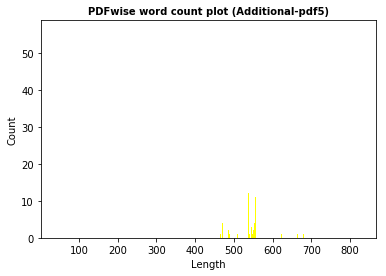

In [73]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf5_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='yellow')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf5)', fontweight ="bold",fontsize=10)
plt.show()

### 5.8) Additional-pdf_6

In [39]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf6_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)
            
            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
        # closing the pdf file object
        pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
Dimensions
© 2019Schneider Electric. All Rights Reserved. Schneider Electric | Life Is On is a trademark and the property of Schneider Electric SE, its subsidiaries, and affiliated companies.
132 Fairgrounds Road  
West Kingston, RI 02892  
United States 
www.apc.com



************************************************     CLEANED TEXT       **********************************************************************
Dimensions 2019Schneider Electric All Rights Reserved Schneider Electric Life Is On is a trademark and the property of Schneider Electric SE its subsidiaries and affiliated companies 132 Fairgrounds Road West Kingston RI 02892 United States www apc com
Word Count =  38


Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************
FURTHER INFORMATION
Please refer to our website www.power-sonic.com  for a complete  
range of useful downloads, such as product catalogs,  
material safety data sheets (MSDS),  
ISO certification, etc.
PSL SERIESPHYSICAL DIMENSIONS: inch (mm) Tolerances are +/- 0.04 in. (+/- 1mm) and +/- 0.08 in. (+/- 2mm) for height dimensions. All data subject to change without notice.
TERMINALS: (mm)
SPECIFICATIONS
ModelBattery 
Type*Nominal  
VoltageRated Capacity Dimensions: inch (mm)
WeightTerminal 
Type 
StandardLength Width Height Total Height
V AH inch mm inch mm inch mm inch mm lbs. kgs.
PSL-12450E E3 12.8 45.0 7.70 195 5.20 130 7.20 183 7.20 183 12.8 5.8 M6
PSL-12500 E3 12.8 51.4 7.70 195 5.20 130 7.20 183 7.20 183 12.8 5.8 M6
PSL-24100 E2 25.6 10.0 7.13 195 3.03 77 6.57 167 6.57 167 6.1 2.75 M6
PSL-24200 E2 25.6 22.0 7.70 181 5.20 130 7.20 183 7

Xref table not zero-indexed. ID numbers for objects will be corrected.




************************************************     EXTRACTED TEXT       **********************************************************************


Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com  
for a complete range of useful downloads, such as 
product catalogs, material safety data sheets  
(MSDS), ISO certification, etc.
PSL-BTC/BTP 
SERIES
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2019. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.
All data subject to change without notice. E&O.EPOWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com GLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USA
T: +1 619 661 2020 
E: customer-service@power-sonic.com Medical Mobility Data Center Transport Sport & 
RecreationUt

Xref table not zero-indexed. ID numbers for objects will be corrected.



Word Count =  380


************************************************     EXTRACTED TEXT       **********************************************************************
WHITE PAPER
www. power-sonic.com 
Rev1: 03/20To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All trademarks are the property of their respective owners.All data subject to change without notice. E&O.EGLOBAL HEADQUARTERS  
(USA AND INTERNATIONAL EXCLUDING EMEA)  
Power-Sonic Corporation  
365 Cabela Dr Suite 300, 
Reno, Nevada 89523  
USAT:
 +1 619  661 2020 
E: custom er-service@power-sonic.com POWER-SONIC EMEA  
(EMEA – EUROPE, MIDDLE EAST AND AFRICA)  
Smitspol 4, 3861 RS Nijkerk,
The Netherlands
T NL:  + 31 33 7410 700 
T UK:  + 44 1268 560 686 
T FR:  + 33 344 32 18 17 
E: salesEMEA@power-sonic.com 
HOW TO CONNECT BATTERIES IN SERIES 
AND PARALLEL  
CONNECTING BATTERIES IN PARALLEL 
Conn

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com for a complete  
range of useful downloads, such as product catalogs,  
material safety data sheets (MSDS),  
ISO certification, etc.
PSL-SH  
SERIESSPECIFICATIONS
ModelBattery 
Management 
SystemSeries 
Connection*Nominal  
VoltageRated Capacity Dimensions: inch (mm)
WeightTerminal 
Type 
StandardLength Width Height Total Height
V AH inch mm inch mm inch mm inch mm lbs. kgs.
PSL-SH-1260 P P 12.8V 6.2 AH 151 5.95 65 2.56 94 3.70 98 3.86 1.76 0.8 F2
PSL-SH-1270 P P 12.8V 7.2 AH 151 5.95 65 2.56 94 3.70 98 3.86 1.98 0.9 F2
PSL-SH-12100 P P 12.8V 10.8 AH 151 5.95 65 2.56 94 3.70 98 3.86 2.75 1.25 F2
PSL-SH-12110 P P 12.8V 11.4 AH 151 5.95 65 2.56 94 3.70 98 3.86 2.87 1.3 F2DIMENSIONS: inch (mm) 
TERMINALS: (mm)
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All tradema

Xref table not zero-indexed. ID numbers for objects will be corrected.


FURTHER INFORMATION
Please refer to our website www.power-sonic.com for a complete  
range of useful downloads, such as product catalogs,  
material safety data sheets (MSDS),  
ISO certification, etc.
PSL-SH  
SERIESSPECIFICATIONS
ModelBattery 
Management 
SystemSeries 
Connection*Nominal  
VoltageRated Capacity Dimensions: inch (mm)
WeightTerminal 
Type 
StandardLength Width Height Total Height
V AH inch mm inch mm inch mm inch mm lbs. kgs.
PSL-SH-1260 P P 12.8V 6.2 AH 151 5.95 65 2.56 94 3.70 98 3.86 1.76 0.8 F2
PSL-SH-1270 P P 12.8V 7.2 AH 151 5.95 65 2.56 94 3.70 98 3.86 1.98 0.9 F2
PSL-SH-12100 P P 12.8V 10.8 AH 151 5.95 65 2.56 94 3.70 98 3.86 2.75 1.25 F2
PSL-SH-12110 P P 12.8V 11.4 AH 151 5.95 65 2.56 94 3.70 98 3.86 2.87 1.3 F2DIMENSIONS: inch (mm) 
TERMINALS: (mm)
www. power-sonic.com To ensure safe and efficient operation always refer to the latest edition of our Technical Manual, as published on our website.
© 2020. Power-Sonic Corporation. All rights reserved. All tradema

[38, 595, 595, 595, 595, 595, 595, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 2805, 595, 595, 595, 595, 595, 595, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 646, 646, 646]


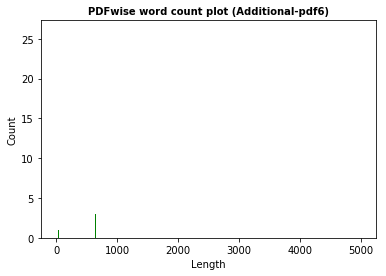

In [74]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf6_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='green',range=(0,5000))
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf6)', fontweight ="bold",fontsize=10)
plt.show()

### 5.9) Additional-pdf_7

In [41]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf7_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)
            
            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
        # closing the pdf file object
        pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
132 Fairgrounds Rd
West Kingston, RI 02892
Phone: + 01 (401) 789 -5735
www.schneider -electric.com
© 2019 Schneider Electric. All rights reserved. All trademarks are owned by Schneider Electric Industries SAS or its affiliat ed companies .www.apc.com/secure -ups


************************************************     CLEANED TEXT       **********************************************************************
132 Fairgrounds Rd West Kingston RI 02892 Phone 01 401 789 5735 www schneider electric com 2019 Schneider Electric All rights reserved All trademarks are owned by Schneider Electric Industries SAS or its affiliat ed companies www apc com secure ups
Word Count =  41


[41]


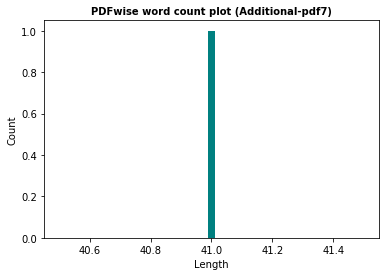

In [42]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf7_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='teal')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf7)', fontweight ="bold",fontsize=10)
plt.show()

### 5.10) Additional-pdf_8

In [43]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf8_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)
            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                # print("Length of the text = ", number_of_characters)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)
        # closing the pdf file object
        pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
132 Fairgrounds Rd
West Kingston, RI 02892
Phone: + 01 (401) 789 -5735
www.schneider -electric.com
© 2019 Schneider Electric. All rights reserved. All trademarks are owned by Schneider Electric Industries SAS or its affiliat ed companies .www.apc.com/secureUPS


************************************************     CLEANED TEXT       **********************************************************************
132 Fairgrounds Rd West Kingston RI 02892 Phone 01 401 789 5735 www schneider electric com 2019 Schneider Electric All rights reserved All trademarks are owned by Schneider Electric Industries SAS or its affiliat ed companies www apc com secureUPS
Word Count =  40


[40]


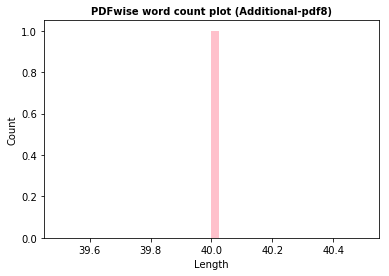

In [44]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf8_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='pink')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf8)', fontweight ="bold",fontsize=10)
plt.show()

### 5.11) Additional-pdf_9

In [45]:
# importing required modules
import PyPDF2
import glob,os,re
import numpy as np
import collections
import matplotlib.pyplot as plt

pdf_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_PDF'
txt_path= 'D:\\IBM_B2B_C_Onboarding\Data\GFK_Text'

all_files = [f for f in listdir(pdf_path) if isfile(join(pdf_path, f))]
pdf_files = [f for f in all_files if splitext(f)[1]=='.pdf']
for file in pdf_files:
    if 'Additional-pdf9_' in file:
        name, extension = splitext(file)
        # print(name)
        # creating a pdf file object
        pdfFileObj = open(pdf_path + '\\' + file, 'rb')
        # creating a pdf reader object
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        # printing number of pages in pdf file
        # creating a page object
        pageObj = pdfReader.numPages
        count =0
        while count >= 0:
            count -= 1
            # creating a page object
            pageObj = pdfReader.getPage(count)
            # extracting text from page
            print("\n")
            print('************************************************     EXTRACTED TEXT       **********************************************************************')
            text = pageObj.extractText()
            print(text)
            print("\n")
            print('************************************************     CLEANED TEXT       **********************************************************************')
            # num = re.findall(r'[0-9]+', text)
            text = str(text)
            text = remove_repeated_words(text, distance = 1)
            text = decontract(text)
            cleaned_text = re.sub('[^A-Za-z0-9]+', ' ', text)   
            print(cleaned_text)
            # storing the cleaned text in a .txt file and save every text file in a directory 
            output_path_filename = txt_path + '\\' + name + '.txt'
            with open(output_path_filename, "w", encoding="utf-8") as text_file:
                text_file.write(cleaned_text)
            with open(output_path_filename, 'r', encoding="utf-8") as file1:
                data=file1.read()
                number_of_characters = len(data)
                Words = 0
                Words+=len(data.split())
                print ("Word Count = ", Words)

    # closing the pdf file object
        pdfFileObj.close()



************************************************     EXTRACTED TEXT       **********************************************************************
132 Fairgrounds Rd
West Kingston, RI 02892
Phone: + 01 (401) 789 -5735
www.schneider -electric.com
© 2019 Schneider Electric. All rights reserved. All trademarks are owned by Schneider Electric Industries SAS or its affiliat ed companies .www.apc.com/secure -ups


************************************************     CLEANED TEXT       **********************************************************************
132 Fairgrounds Rd West Kingston RI 02892 Phone 01 401 789 5735 www schneider electric com 2019 Schneider Electric All rights reserved All trademarks are owned by Schneider Electric Industries SAS or its affiliat ed companies www apc com secure ups
Word Count =  41


[41]


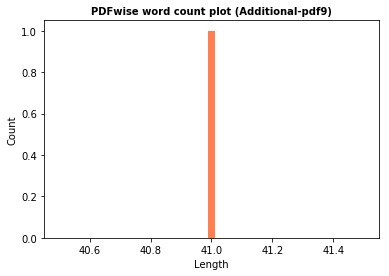

In [46]:
# Finding the word count and plotting the histograms
file_paths=[]
for root, dirs, files in os.walk(txt_path):
    for file in files:
        if 'Additional-pdf9_' in file:
            file_paths.append(os.path.join(root,file))
word_counts = []
# Iterate over all the files in the file_paths
for path in file_paths:
         with open(path, 'r', encoding="utf-8") as file:
                word_counts.append(len(file.read().split(' ')))
print(word_counts)
y = np.max(word_counts)
# Plotting the histograms
plt.hist(word_counts,bins=y,color ='coral')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('PDFwise word count plot (Additional-pdf9)', fontweight ="bold",fontsize=10)
plt.show()

# *************************************************************************

## Dont refer this below part B

## Part B) Machine Learning Pipeline for PDF Text Extraction

In [ ]:
# !pip install --user fitz
# !pip install --user PyMuPDF

In [ ]:
# %cd C:\Users\ishan_borker\Desktop\IBM_B2B_C_Onboarding\Data\GFK_PDF

In [ ]:
# import fitz
# import pandas as pd 
# doc = fitz.open('Additional-pdf1_1018833209.pdf')
# page1 = doc[0]
# words = page1.get_text()

In [ ]:
# words

### 1) Extract the coordinates of the first object

In [ ]:
# print(page1.rect)
# def make_text(words):

#     line_dict = {} 

#     words.sort(key=lambda w: w[0])

#     for w in words:  

#         y1 = round(w[3], 1)  

#         word = w[4] 

#         line = line_dict.get(y1, [])  

#         line.append(word)  

#         line_dict[y1] = line  

#     lines = list(line_dict.items())

#     lines.sort()  

#     return "n".join([" ".join(line[1]) for line in lines])

In [ ]:
# first_annots=[]

# rec=page1.rect

# rec

# #Information of words in first object is stored in mywords

# mywords = [w for w in words if fitz.Rect(w[:4]) in rec]

# ann= make_text(mywords)

# first_annots.append(ann)

### 2) Function selects the words contained in the box, sort the words and return in form of a string

In [ ]:
# print(rec)

In [ ]:
# print(first_annots)

### 3)  Extracting each page of the document and all the annots/rectanges 

In [ ]:
# # all_annots=[]
# for pageno in range(0,len(doc)-1):

#     page = doc[pageno]

#     words = page.get_text("words")

#     all_annots=[]
#     for annot in page.annots():

#         if annot!=None:

#             rec=annot.rect

#             mywords = [w for w in words if fitz.Rect(w[:4]) in rec]

#             ann= make_text(mywords)

#             all_annots.append(ann)

In [ ]:
# print(all_annots)

### 4) Data Cleaning and Data Processing

In [ ]:
# count=[]

# for i in range(0,len(all_annots)):

#     count.append(all_annots[i].split('n',1))
# print(count)

In [ ]:
# # Removing the unnecessary symbols
# list1=[]

# for i in range(0,len(count)):

#     lis=[]

#     for j in count[i]:

#         j=j.replace('*','')

#         j=j.replace('#','')

#         j=j.replace(':','')

#         j=j.strip()

#         #print(j)

#         lis.append(j)

#     list1.append(lis)
# print(list1)

In [ ]:
# #Spliting into keys and values and removing spaces in the values which only contain digits
# keys=[]

# values=[]

# for i in list1:

#     keys.append(i[0])

#     values.append(i[1])

# for i in range(0, len(values)):

#     for j in range(0,len(values[i])):

#         if values[i][j]>='A' and values[i][j]<='Z':

#             break            

#     if j==len(values[i])-1:
#         values[i]=values[i].replace(' ','')

In [ ]:
# report=dict(zip(keys,values))
# report